## ACCIDENT PREDICTION

In [15]:
# Importing the required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, cross_val_score
from scipy.stats import uniform
import shap

from sklearn.metrics import roc_auc_score, roc_curve

In [282]:
#!pip install lightgbm
#!D:\Apps\WPy64-31241\python-3.12.4.amd64\python.exe -m pip install --upgrade pip

In [283]:
import sys
import sklearn
import imblearn
import lightgbm
import notebook

print("Python version:", platform.python_version())
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Imbalanced-learn version:", imblearn.__version__)
print("LightGBM version:", lightgbm.__version__)
print("Jupyter Notebook version:", notebook.__version__)

Python version: 3.12.4
Numpy version: 1.26.4
Pandas version: 2.2.2
Scikit-learn version: 1.5.0
Imbalanced-learn version: 0.12.3
LightGBM version: 4.5.0
Jupyter Notebook version: 7.2.1


In [284]:
# Import dataset

acc_data = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-collision-2022.csv', low_memory=False)

In [285]:
# Shape of the dataset

print(f'rows and columns : {acc_data.shape}')
acc_data.head()

rows and columns : (106004, 36)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2022010352073,2022,010352073,525199.0,177928.0,-0.198224,51.486454,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001883
1,2022010352573,2022,010352573,546214.0,179866.0,0.105042,51.498830,1,3,2,...,4,4,1,1,0,0,2,1,2,E01033745
2,2022010352575,2022,010352575,551119.0,174789.0,0.173482,51.451924,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000378
3,2022010352578,2022,010352578,528889.0,192230.0,-0.139873,51.614153,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001529
4,2022010352580,2022,010352580,539773.0,190404.0,0.016495,51.595151,1,3,4,...,0,4,1,1,0,0,1,1,2,E01003673


In [286]:
# Checking the features and their data types

acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106004 entries, 0 to 106003
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               106004 non-null  object 
 1   accident_year                                106004 non-null  int64  
 2   accident_reference                           106004 non-null  object 
 3   location_easting_osgr                        105982 non-null  float64
 4   location_northing_osgr                       105982 non-null  float64
 5   longitude                                    105982 non-null  float64
 6   latitude                                     105982 non-null  float64
 7   police_force                                 106004 non-null  int64  
 8   accident_severity                            106004 non-null  int64  
 9   number_of_vehicles                           106004 non-nul

# Data Cleaning

In [287]:
# NULL Values:

print(acc_data.isnull().sum()[acc_data.isnull().sum() > 0])

location_easting_osgr     22
location_northing_osgr    22
longitude                 22
latitude                  22
dtype: int64


In [288]:
# Missing values:

missing_values = (acc_data == -1).sum().sort_values(ascending=False)
print(missing_values[(acc_data == -1).sum() > 0])

local_authority_district                   106004
junction_control                            44977
second_road_number                          44339
trunk_road_flag                              7440
carriageway_hazards                           746
special_conditions_at_site                    746
pedestrian_crossing_human_control             703
road_surface_conditions                       694
pedestrian_crossing_physical_facilities       689
second_road_class                              89
light_conditions                                1
dtype: int64


In [289]:
# Duplicate values:

dup = acc_data.duplicated(keep=False)
print(f'Duplicate rows: {dup.sum()}')

Duplicate rows: 0


In [290]:
# Remove NULL values

acc_data.dropna(inplace= True)
print(f'rows and columns : {acc_data.shape}')
print(acc_data.isnull().sum())

rows and columns : (105982, 36)
accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                            

## Data transformation

In [291]:
# Setting accident_reference (unique identifier) as the index
acc_data.set_index('accident_reference', inplace=True)

# Checking the dtypes:
print(f'Datatypes and count:\n{acc_data.dtypes.value_counts()}')


Datatypes and count:
int64      25
object      6
float64     4
Name: count, dtype: int64


In [292]:
acc_data.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,105982.0,105982.000000,1.059820e+05,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000,...,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000,105982.000000
mean,2022.0,456185.969712,2.737026e+05,-1.193248,52.350694,27.500094,2.749665,1.825819,1.278113,4.169746,...,0.346512,1.149761,2.010672,1.636778,1.346097,0.242249,0.197552,1.322876,1.481808,1.725604
std,0.0,92675.056707,1.448351e+05,1.354639,1.305092,24.195763,0.466799,0.688323,0.699534,1.940647,...,1.686648,2.392097,1.689393,1.851842,0.972999,1.345632,1.233218,0.467578,0.766994,0.787491
min,2022.0,79266.000000,1.050200e+04,-7.353562,49.914329,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000
25%,2022.0,393713.500000,1.748662e+05,-2.095449,51.460020,4.000000,3.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2022.0,463869.500000,2.120655e+05,-1.072387,51.791263,22.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2022.0,529860.750000,3.810268e+05,-0.129542,53.320160,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2022.0,655345.000000,1.172667e+06,1.759829,60.435892,99.000000,3.000000,16.000000,16.000000,7.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,2.000000,3.000000,2.000000


In [293]:
# Feature list for numerical and object datatype

df_tmp = acc_data.copy()
obj =df_tmp.select_dtypes('object')
in_fl = df_tmp.select_dtypes(['int64', 'float64'])
print(f'object:\n {obj.columns}')
print(f'\ninteger and float:\n {in_fl.columns}')

print(df_tmp.shape)
print(obj.shape)
print(in_fl.shape)

object:
 Index(['accident_index', 'date', 'time', 'local_authority_ons_district',
       'local_authority_highway', 'lsoa_of_accident_location'],
      dtype='object')

integer and float:
 Index(['accident_year', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'day_of_week',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag'],
      dtype='object')
(105982, 35)
(105982, 6)
(105982, 29)


In [294]:
# Encoding the selected string features:

change = ['local_authority_ons_district', 'local_authority_highway', 'lsoa_of_accident_location']
for col in change:
    acc_data[col] = LabelEncoder().fit_transform(acc_data[col])

In [295]:
# Converting datatype:
# 1. date and time to datetime 

acc_data['date'] = pd.to_datetime(acc_data['date'], format='%d/%m/%Y')
acc_data['time'] = pd.to_datetime(acc_data['time'], format='%H:%M')


# 2. float to int
for col in acc_data.columns:
    if acc_data[col].dtype == 'float64':
        acc_data[col] = acc_data[col].astype(int)



In [296]:
# Creating new features:

# 1. month from date
acc_data['month'] = acc_data['date'].dt.month


# 2. hour from time
acc_data['hour'] = acc_data['time'].dt.hour


# 3. hour_of_day from hour
# Grouping hours to create hour_of_day
# Morning - 6- 11
# Afternoon - 12 -17
# Evening - 18 - 22
# Night - 23 - 5

bins = [-1, 5, 11, 17, 22, 24]
labels = [4, 0, 1, 2, 4]

start_time = time.time()
acc_data['hour_of_day'] = pd.cut(acc_data['hour'], bins=bins, labels=labels, ordered=False, right=False)
acc_data['hour_of_day'] = acc_data['hour_of_day'].astype(int)
acc_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 105982 entries, 010352073 to 991322411
Data columns (total 38 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               105982 non-null  object        
 1   accident_year                                105982 non-null  int64         
 2   location_easting_osgr                        105982 non-null  int32         
 3   location_northing_osgr                       105982 non-null  int32         
 4   longitude                                    105982 non-null  int32         
 5   latitude                                     105982 non-null  int32         
 6   police_force                                 105982 non-null  int64         
 7   accident_severity                            105982 non-null  int64         
 8   number_of_vehicles                           105982 non-nu

In [297]:
acc_data['hour_of_day'].value_counts()

hour_of_day
1    41688
2    30078
0    23349
4    10867
Name: count, dtype: int64

In [298]:
acc_data.to_pickle('acc_trfmd.pkl')

In [299]:
acc_data = pd.read_pickle('acc_trfmd.pkl')

# Outliers

In [300]:
# OUTLIERS for the numerical features

num = acc_data.select_dtypes(exclude='object')
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1
outl = ((num < (Q1 - 1.5 * IQR)) | (num > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

print(f'Outliers detected using IQR:\n{outl}')


Outliers detected using IQR:
road_type                                      29442
pedestrian_crossing_physical_facilities        26050
accident_severity                              24929
number_of_casualties                           20131
weather_conditions                             19060
speed_limit                                    18510
first_road_number                              16306
second_road_number                             15046
trunk_road_flag                                14207
hour_of_day                                    10867
junction_detail                                 9834
pedestrian_crossing_human_control               6374
special_conditions_at_site                      4971
carriageway_hazards                             4554
road_surface_conditions                         3616
number_of_vehicles                              2157
location_northing_osgr                          1180
location_easting_osgr                            625
latitude         

# Feature Selection


In [301]:
# Highly correlated features:

df = acc_data.drop(columns=['accident_index', 'date', 'time', 'accident_severity'])

corr_matrix = df.corr()

thresh = 0.6

high_corr = np.where(np.abs(corr_matrix) > thresh)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

print('Highly correlated features:\n')
for pair in high_corr_pairs:
    print(f'{pair[0]} and {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]}')


Highly correlated features:

location_easting_osgr and longitude: 0.9614409691742064
location_northing_osgr and latitude: 0.9833105075740364
police_force and trunk_road_flag: -0.6210155245576359
speed_limit and urban_or_rural_area: 0.6742155318735098
junction_control and second_road_class: 0.8881393504857441
special_conditions_at_site and carriageway_hazards: 0.6206708970222786


In [302]:
# Correlation between input features and target

df1 = acc_data.drop(columns=['accident_index', 'date', 'time'])
df1.corr()['accident_severity'].sort_values(ascending=False)

accident_severity                              1.000000
did_police_officer_attend_scene_of_accident    0.190406
junction_control                               0.077215
longitude                                      0.075732
trunk_road_flag                                0.073078
pedestrian_crossing_human_control              0.072653
location_easting_osgr                          0.070512
junction_detail                                0.065577
number_of_vehicles                             0.063220
second_road_class                              0.061822
pedestrian_crossing_physical_facilities        0.053222
weather_conditions                             0.041919
special_conditions_at_site                     0.041807
carriageway_hazards                            0.036376
second_road_number                             0.020215
road_surface_conditions                        0.018931
first_road_class                               0.015379
local_authority_ons_district                   0

In [303]:
acc_data = acc_data.drop(columns=['accident_index', 'accident_year', 'date', 'time', 'local_authority_district'])

In [304]:
acc_data.to_pickle('acc_feat.pkl')

In [305]:
#acc_data = pd.read_pickle('acc_feat.pkl')

# Merging minority classes of target to form binary class

In [307]:
print(acc_data.accident_severity.value_counts())
print((acc_data['accident_severity'].value_counts(normalize=True) * 100).round(2))


accident_severity
3    81053
2    23327
1     1602
Name: count, dtype: int64
accident_severity
3    76.48
2    22.01
1     1.51
Name: proportion, dtype: float64


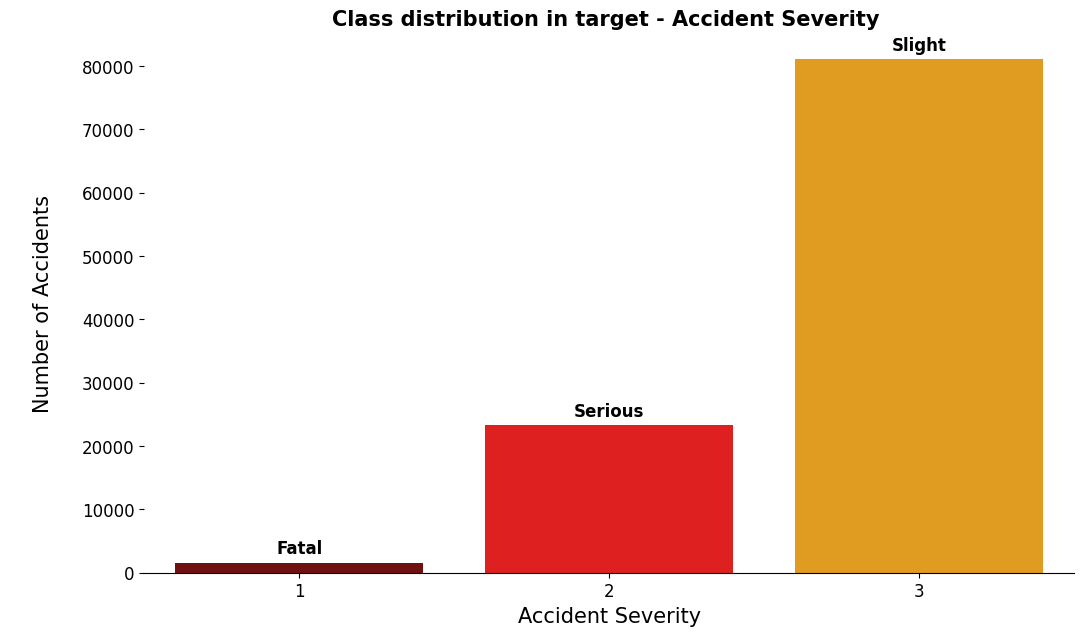

In [308]:
# Checking class imbalance

plt.figure(figsize=(12, 7))


palette = {1: 'maroon', 2: 'red', 3: 'orange'}

ax = sns.countplot(x='accident_severity', data=acc_data, palette=palette, hue='accident_severity', legend=False)

plt.style.use('default')
plt.title('Class distribution in target - Accident Severity ', fontsize=15, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=15)
plt.ylabel('\nNumber of Accidents\n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p, label in zip(ax.patches, ['Fatal', 'Serious', 'Slight']):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=False)

plt.show()

In [309]:
# Maping severity 
# 0 - Not_Serious (Slight)
# 1 - Serious (Fatal and Serious)

map_severity = {1: 1, 2: 1, 3: 0}
acc_data['accident_severity'] = acc_data['accident_severity'].map(map_severity)

print(acc_data.accident_severity.value_counts())
print((acc_data['accident_severity'].value_counts(normalize=True) * 100).round(2))

acc_data.to_pickle('acc_classmap.pkl')

accident_severity
0    81053
1    24929
Name: count, dtype: int64
accident_severity
0    76.48
1    23.52
Name: proportion, dtype: float64


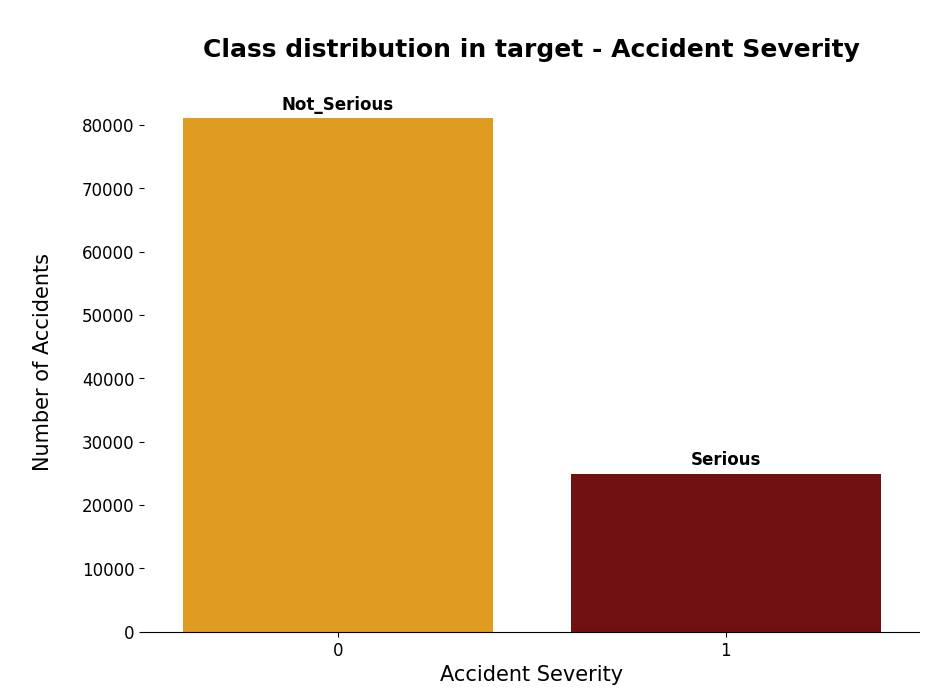

In [310]:
plt.figure(figsize=(10, 7))

palette = {0: 'orange', 1: 'maroon'}

ax = sns.countplot(x='accident_severity', data=acc_data, palette=palette, hue='accident_severity', legend=False)
plt.style.use('default')
plt.title('\nClass distribution in target - Accident Severity\n', fontsize=18, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=15)
plt.ylabel('\nNumber of Accidents\n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p, label in zip(ax.patches, ['Not_Serious', 'Serious']):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=False)

plt.show()


# Exploratory Data Analysis

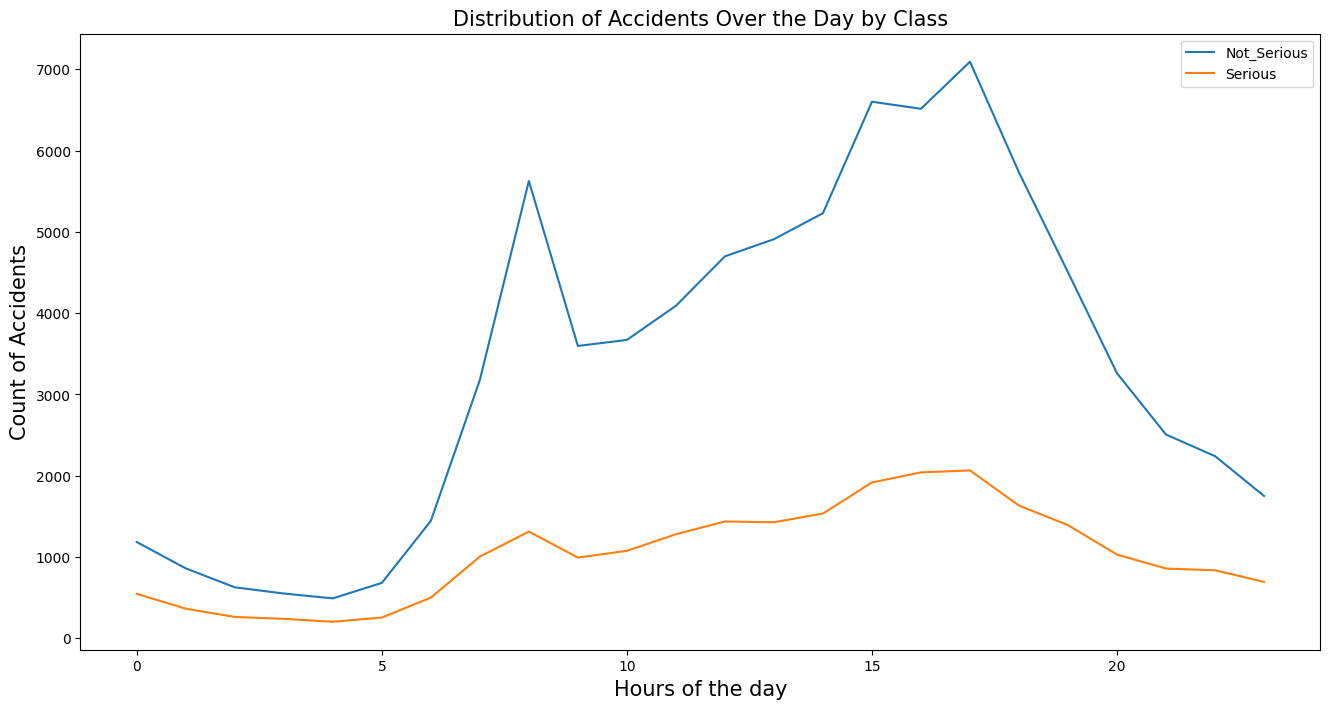

In [311]:
# Distribution of Accidents Over the Day by Class

class_0 = acc_data[acc_data['accident_severity'] == 0]
class_1 = acc_data[acc_data['accident_severity'] == 1]

plt.figure(figsize=(16, 8))

ax0 = class_0['hour'].value_counts().sort_index().plot(kind='line', label='Not_Serious')
ax1 = class_1['hour'].value_counts().sort_index().plot(kind='line', label='Serious')
plt.xlabel('Hours of the day', fontsize=15)
plt.ylabel('Count of Accidents', fontsize=15)
plt.title('Distribution of Accidents Over the Day by Class', fontsize=15)
plt.legend()

plt.show()


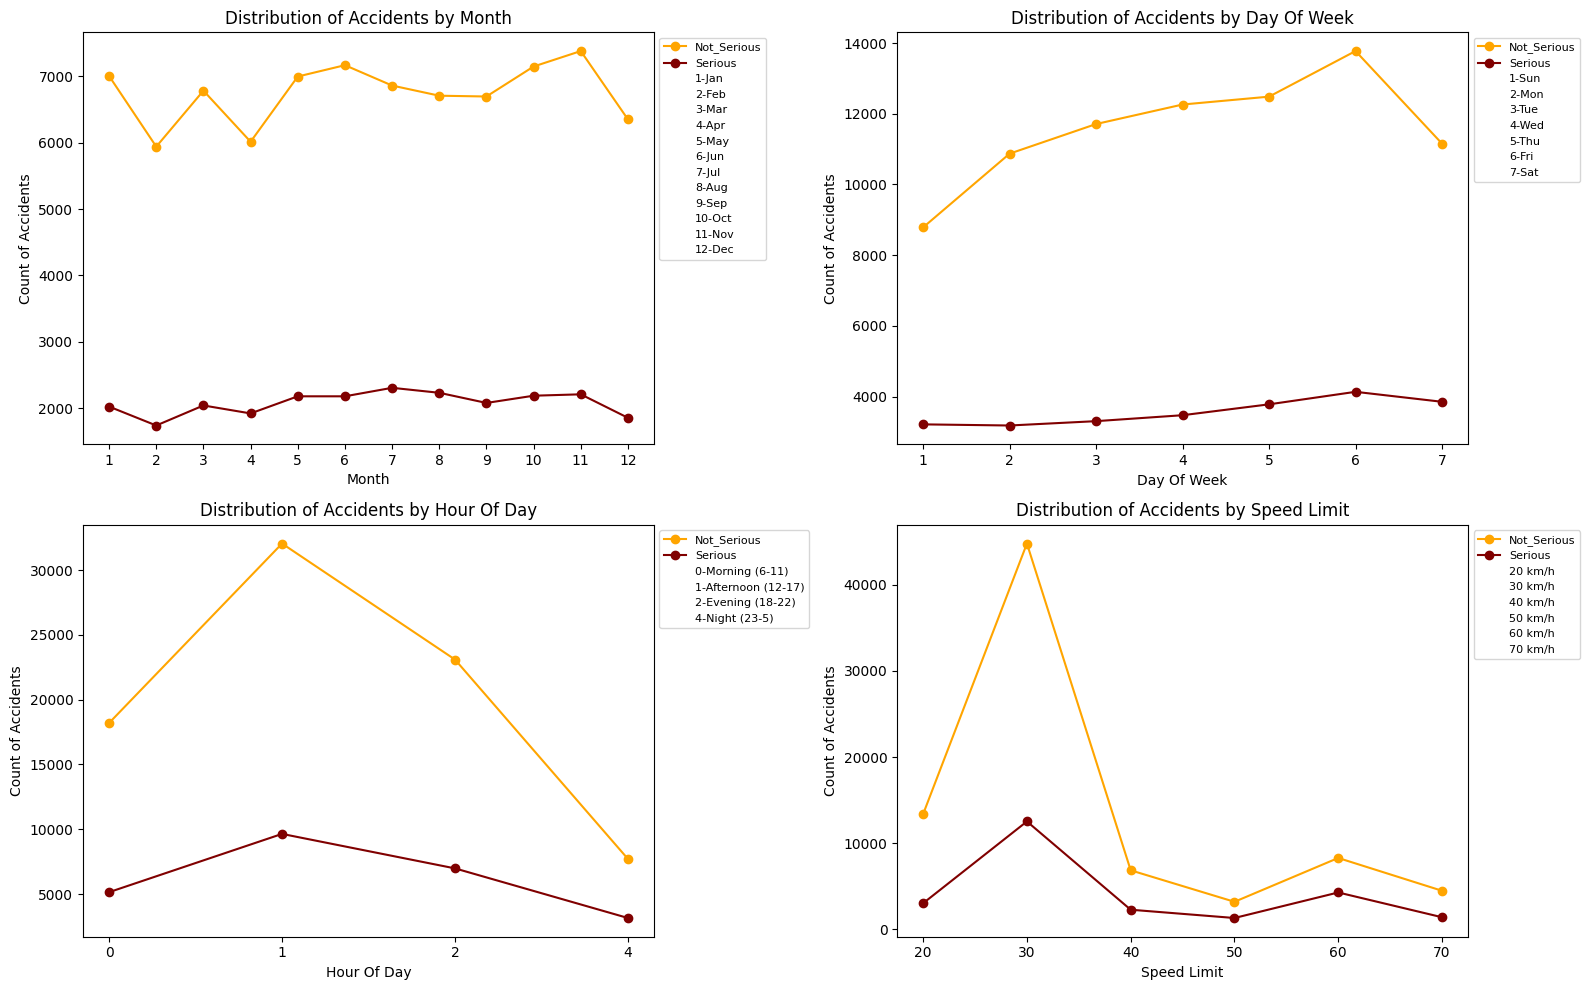

In [312]:
# Distribution of accidents by ‘month’, ‘day_of_week’, ‘hour_of_day’ and ‘speed_limit’

features_part1 = {
    'month': list(range(1, 13)),
    'day_of_week': list(range(1, 8)),
    'hour_of_day': [0, 1, 2, 4],
    'speed_limit': [20, 30, 40, 50, 60, 70]

}

# Labels for legend explanations
legend_labels_part1 = {
    'month': [
        '1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-Jun', 
        '7-Jul', '8-Aug', '9-Sep', '10-Oct', '11-Nov', '12-Dec'
    ],
    'day_of_week': [
        '1-Sun', '2-Mon', '3-Tue', '4-Wed', '5-Thu', '6-Fri', '7-Sat'
    ],
    'hour_of_day': [
        '0-Morning (6-11)', '1-Afternoon (12-17)', '2-Evening (18-22)', '4-Night (23-5)'
    ],   
    'speed_limit': [
        '20 km/h', '30 km/h', '40 km/h', '50 km/h', '60 km/h', '70 km/h'
    ]

}

plt.figure(figsize=(16, 10))

for i, (feature, categories) in enumerate(features_part1.items()):
    plt.subplot(2, 2, i + 1)
    
    class_0 = acc_data[acc_data['accident_severity'] == 0]
    class_1 = acc_data[acc_data['accident_severity'] == 1]
    
    counts_class_0 = class_0[feature].value_counts().reindex(categories, fill_value=0)
    counts_class_1 = class_1[feature].value_counts().reindex(categories, fill_value=0)
    
    indices = np.arange(len(categories))
    
    line1, = plt.plot(indices, counts_class_0, label='Not_Serious', color='orange', marker='o')
    line2, = plt.plot(indices, counts_class_1, label='Serious', color='maroon', marker='o')
    
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=10)
    plt.ylabel('Count of Accidents', fontsize=10)
    plt.title(f'Distribution of Accidents by {feature.replace("_", " ").title()}', fontsize=12)
    plt.xticks(indices, categories) 

    legend_lines = [line1, line2]
    legend_labels = ['Not_Serious', 'Serious']
    legend_labels.extend(legend_labels_part1[feature])
    for idx, label in enumerate(legend_labels_part1[feature]):
        legend_lines.append(plt.Line2D([0], [0], color='white', lw=0)) 

    plt.legend(legend_lines, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

plt.tight_layout()
plt.show()


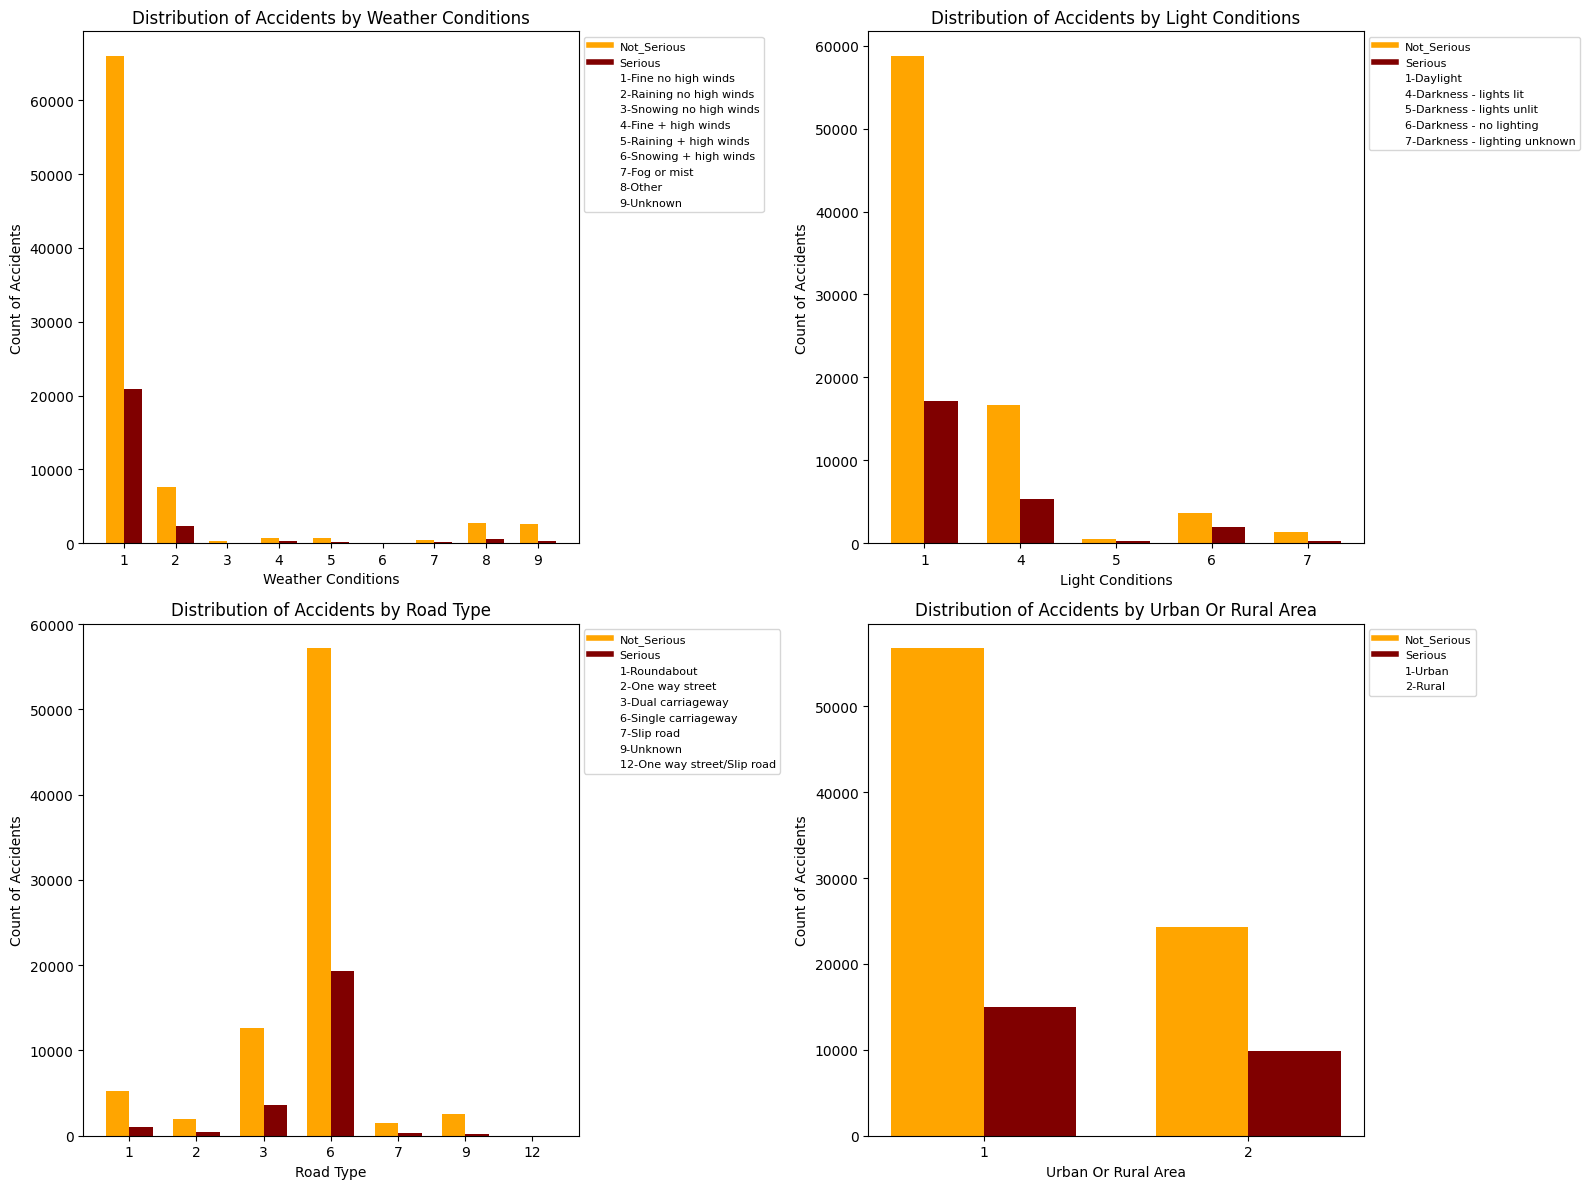

In [313]:
# Distribution of accidents by ‘weather_condition’, ‘light_condition’, ‘road_type’ and ‘urban_or_rural_area’

features_part2 = {
    'weather_conditions': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'light_conditions': [1, 4, 5, 6, 7],
    'road_type': [1, 2, 3, 6, 7, 9, 12],
    'urban_or_rural_area': [1, 2]
}

legend_labels_part2 = {
    'weather_conditions': [
        '1-Fine no high winds', '2-Raining no high winds', '3-Snowing no high winds', 
        '4-Fine + high winds', '5-Raining + high winds', '6-Snowing + high winds', 
        '7-Fog or mist', '8-Other', '9-Unknown'
    ],
    'light_conditions': [
        '1-Daylight', '4-Darkness - lights lit', '5-Darkness - lights unlit', 
        '6-Darkness - no lighting', '7-Darkness - lighting unknown'
    ],
    'road_type': [
        '1-Roundabout', '2-One way street', '3-Dual carriageway', 
        '6-Single carriageway', '7-Slip road', '9-Unknown', '12-One way street/Slip road'
    ],
    'urban_or_rural_area': ['1-Urban', '2-Rural']
}

plt.figure(figsize=(16, 12))

for i, (feature, categories) in enumerate(features_part2.items()):
    plt.subplot(2, 2, i + 1)
    
    class_0 = acc_data[acc_data['accident_severity'] == 0]
    class_1 = acc_data[acc_data['accident_severity'] == 1]
    
    counts_class_0 = class_0[feature].value_counts().reindex(categories, fill_value=0)
    counts_class_1 = class_1[feature].value_counts().reindex(categories, fill_value=0)
    
    indices = np.arange(len(categories))
    width = 0.35 
    
    plt.bar(indices - width/2, counts_class_0, width=width, label='Not_Serious', color='orange')
    plt.bar(indices + width/2, counts_class_1, width=width, label='Serious', color='maroon')
    
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=10)
    plt.ylabel('Count of Accidents', fontsize=10)
    plt.title(f'Distribution of Accidents by {feature.replace("_", " ").title()}', fontsize=12)
    plt.xticks(indices, categories)
    
    handles = [plt.Line2D([0], [0], color='orange', lw=4, label='Not_Serious'),
               plt.Line2D([0], [0], color='maroon', lw=4, label='Serious')]
    for category_label in legend_labels_part2[feature]:
        handles.append(plt.Line2D([0], [0], color='white', lw=0, label=category_label))
    plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

plt.tight_layout()
plt.show()


# Feature Importance


In [314]:
# Separating the input and target features:
#acc_data = pd.read_pickle('acc_classmap.pkl')
x = acc_data.drop('accident_severity', axis = 1)
y = acc_data['accident_severity']
y.value_counts()

accident_severity
0    81053
1    24929
Name: count, dtype: int64

In [315]:
# Feature importance using RF:

model = RandomForestClassifier(random_state=42)
model.fit(x, y)
feature_importances = model.feature_importances_
imp_ft = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
imp_ft_sorted = imp_ft.sort_values(by='Importance', ascending=False)
print(imp_ft_sorted)

                                        Feature  Importance
1                        location_northing_osgr    0.103441
0                         location_easting_osgr    0.101050
28                    lsoa_of_accident_location    0.090553
30                                         hour    0.068468
29                                        month    0.063248
11                            first_road_number    0.055908
7                                   day_of_week    0.053145
8                  local_authority_ons_district    0.048412
9                       local_authority_highway    0.036929
26  did_police_officer_attend_scene_of_accident    0.028693
5                            number_of_vehicles    0.026017
13                                  speed_limit    0.025318
14                              junction_detail    0.025134
31                                  hour_of_day    0.024911
4                                  police_force    0.022031
6                          number_of_cas

1.0


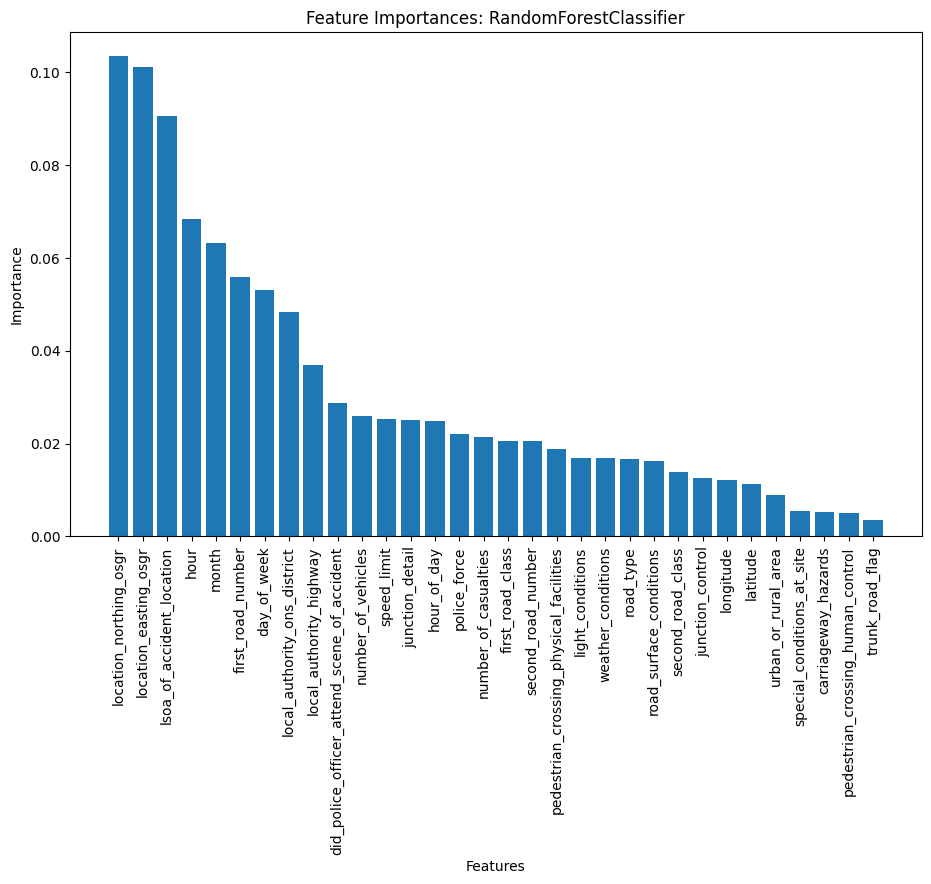

In [316]:
# Bar graph for feature importance

def feature_importance(model):
    clf = model(random_state=42)
    clf.fit(x, y)
    
    print(clf.feature_importances_.sum())
    feature_importances = clf.feature_importances_
    imp_ft = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
    imp_ft_sorted = imp_ft.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(imp_ft_sorted['Feature'], imp_ft_sorted['Importance'])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Feature Importances: {model.__name__}')
    plt.tight_layout()
    plt.xticks(rotation=90) 
    plt.show()


feature_importance(RandomForestClassifier)

# Sampling dataset to mitigate class imbalance

## Random Under sampling Technique


RUS time: 0.00
Classes before RUS:          Counter({0: 81053, 1: 24929})
Classes with RUS  :          Counter({0: 24929, 1: 24929})


<function matplotlib.pyplot.show(close=None, block=None)>

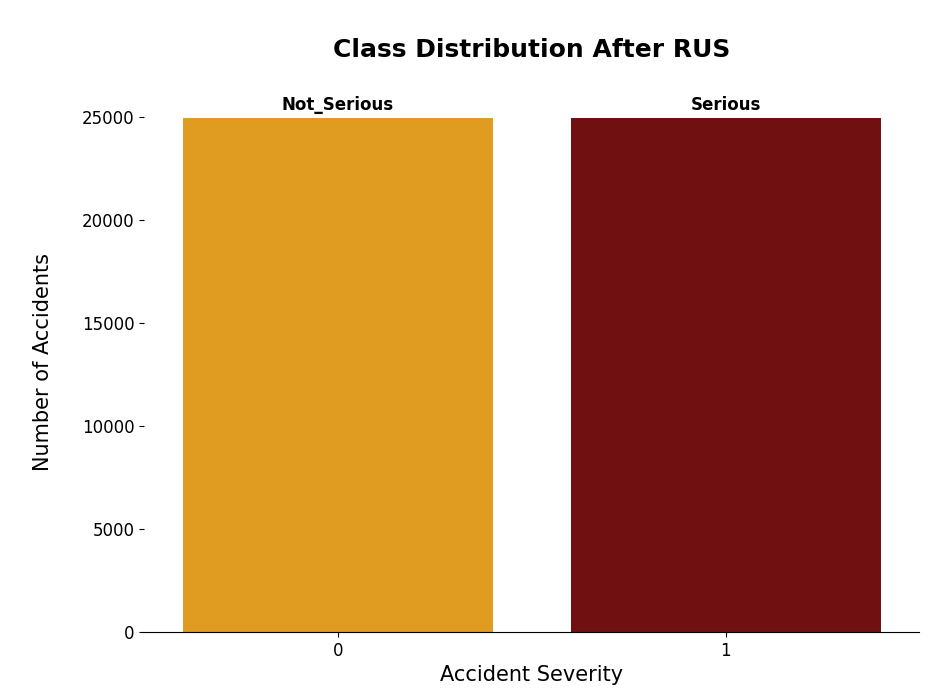

In [317]:
# RUS 

start = time.time()
RUS = RandomUnderSampler(random_state=42) 
x_rus, y_rus = RUS.fit_resample(x, y)

end = time.time()
run = end - start

print(f'RUS time: {run / 60:.2f}')
print(f'Classes before RUS:          {Counter(y)}')
print(f'Classes with RUS  :          {Counter(y_rus)}')

# Plotting the class distribution after RUS

resampled_data = pd.DataFrame({'accident_severity': y_rus.astype(str)})

palette = {'0': 'orange', '1': 'maroon'}

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='accident_severity', data=resampled_data, hue='accident_severity', palette=palette, legend=False)
plt.style.use('default')
plt.title('\nClass Distribution After RUS\n', fontsize=18, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=15)
plt.ylabel('\nNumber of Accidents\n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p, label in zip(ax.patches, ['Not_Serious', 'Serious']):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=12, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=False)

plt.show



## Tomek Links undersampling

TomekLinks time: 1.93
Classes before TomekLinks:          Counter({0: 81053, 1: 24929})
Classes with TomekLinks  :          Counter({0: 70033, 1: 24929})


<function matplotlib.pyplot.show(close=None, block=None)>

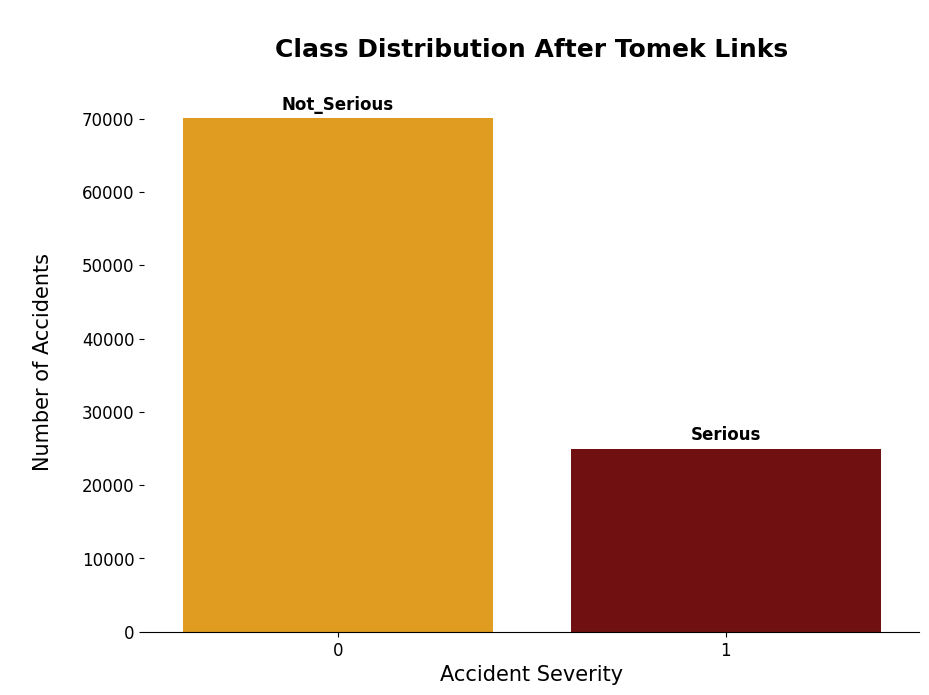

In [318]:
# TomekLinks

start = time.time()
tom = TomekLinks()

x_tom, y_tom = tom.fit_resample(x, y)

end = time.time()
run = end - start

print(f'TomekLinks time: {run / 60:.2f}')
print(f'Classes before TomekLinks:          {Counter(y)}')
print(f'Classes with TomekLinks  :          {Counter(y_tom)}')

# Plotting the class distribution after Tomek Links

resampled_data = pd.DataFrame({'accident_severity': y_tom.astype(str)})

palette = {'0': 'orange', '1': 'maroon'}

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='accident_severity', data=resampled_data, hue='accident_severity', palette=palette, legend=False)
plt.style.use('default')
plt.title('\nClass Distribution After Tomek Links\n', fontsize=18, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=15)
plt.ylabel('\nNumber of Accidents\n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p, label in zip(ax.patches, ['Not_Serious', 'Serious']):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=12, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=False)

plt.show


## SMOTE - Synthetic Minority Over-sampling Technique

SMOTE time: 0.13
Classes before SMOTE:          Counter({0: 81053, 1: 24929})
Classes with SMOTE  :          Counter({0: 81053, 1: 81053})


<function matplotlib.pyplot.show(close=None, block=None)>

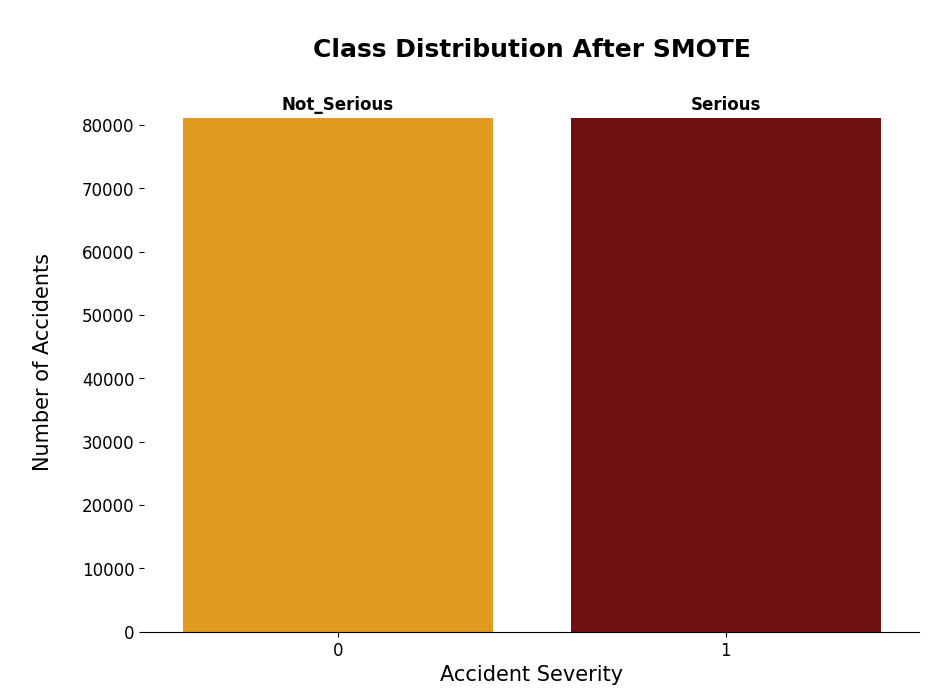

In [319]:
# SMOTE 

start = time.time()
smot = SMOTE(random_state=42)
x_smote, y_smote = smot.fit_resample(x, y)

end = time.time()
run = end - start

print(f'SMOTE time: {run / 60:.2f}')
print(f'Classes before SMOTE:          {Counter(y)}')
print(f'Classes with SMOTE  :          {Counter(y_smote)}')

# Plotting the class distribution after SMOTE

resampled_data = pd.DataFrame({'accident_severity': y_smote.astype(str)})

palette = {'0': 'orange', '1': 'maroon'}

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='accident_severity', data=resampled_data, hue='accident_severity', palette=palette, legend=False)
plt.style.use('default')
plt.title('\nClass Distribution After SMOTE\n', fontsize=18, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=15)
plt.ylabel('\nNumber of Accidents\n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p, label in zip(ax.patches, ['Not_Serious', 'Serious']):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=12, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=False)

plt.show


## SMOTETomek

SMOTETomek time:5.09
Classes before SMOTETomek:          Counter({0: 81053, 1: 24929})
Classes with SMOTETomek  :          Counter({0: 70952, 1: 70952})


<function matplotlib.pyplot.show(close=None, block=None)>

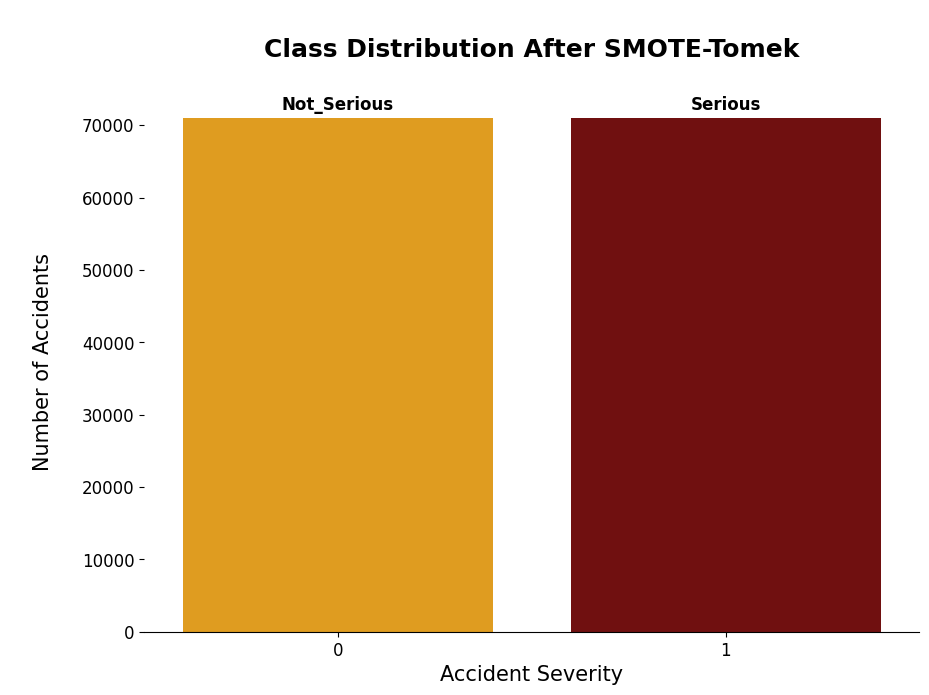

In [320]:
# SmoteTomek

start = time.time()
smot_tom = SMOTETomek(random_state=42)

x_smot_tom, y_smot_tom = smot_tom.fit_resample(x, y)

end = time.time()
run = end - start

print(f'SMOTETomek time:{run / 60:.2f}')
print(f'Classes before SMOTETomek:          {Counter(y)}')
print(f'Classes with SMOTETomek  :          {Counter(y_smot_tom)}')

# Plotting the class distribution after SMOTE-Tomek

resampled_data = pd.DataFrame({'accident_severity': y_smot_tom.astype(str)})

palette = {'0': 'orange', '1': 'maroon'}

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='accident_severity', data=resampled_data, hue='accident_severity', palette=palette, legend=False)
plt.style.use('default')
plt.title('\nClass Distribution After SMOTE-Tomek\n', fontsize=18, fontweight='bold')
plt.xlabel('Accident Severity', fontsize=15)
plt.ylabel('\nNumber of Accidents\n', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p, label in zip(ax.patches, ['Not_Serious', 'Serious']):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=12, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=False)

plt.show


## All plots after smapling

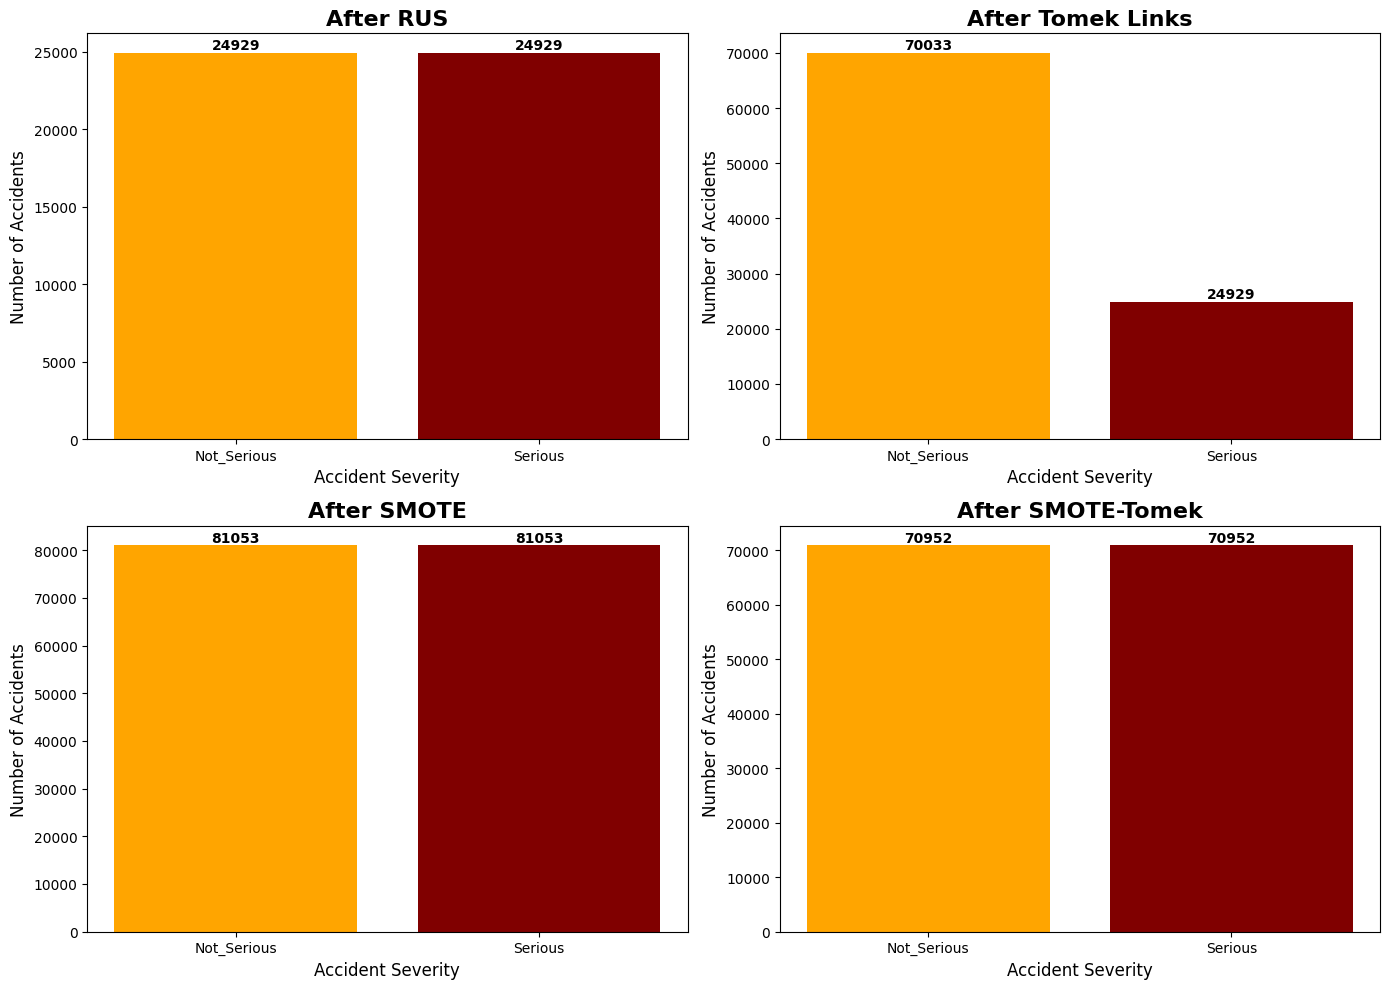

In [321]:
methods_data = {
    'After RUS': y_rus,
    'After Tomek Links': y_tom,
    'After SMOTE': y_smote,
    'After SMOTE-Tomek': y_smot_tom
}

class_labels = ['Not_Serious', 'Serious']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for ax, (title, resampled_y) in zip(axs, methods_data.items()):
    counter = Counter(resampled_y)
    counts = [counter.get(0, 0), counter.get(1, 0)]
    
    ax.bar(class_labels, counts, color=['orange', 'maroon'])
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Accident Severity', fontsize=12)
    ax.set_ylabel('Number of Accidents', fontsize=12)
    ax.tick_params(axis='y', labelsize=10)
    
    for i, count in enumerate(counts):
        ax.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.tight_layout()
plt.show()


# Feature Scaling

In [323]:
# Scaling using StandardScaler

std = StandardScaler()

x_sc = std.fit_transform(x)

# Scaling all sampled x
x_smote_sc = std.fit_transform(x_smote)
x_rus_sc = std.fit_transform(x_rus)
x_tom_sc = std.fit_transform(x_tom)
x_smot_tom_sc = std.fit_transform(x_smot_tom)


print('Scalled x using Standardisation: ', x_sc)

Scalled x using Standardisation:  [[ 0.74468102 -0.66126976  0.75861641 ... -1.62700821  0.43961392
  -0.32683423]
 [ 0.97144214 -0.64788896  0.75861641 ... -1.62700821 -2.44643147
   2.31531263]
 [ 1.02436925 -0.68294278  0.75861641 ... -1.62700821 -2.44643147
   2.31531263]
 ...
 [-2.17740273  2.69166966 -2.62780981 ...  0.12530922 -0.52240121
  -0.32683423]
 [-1.41114116  2.78491408 -1.78120325 ...  1.58557375  0.43961392
  -0.32683423]
 [-1.41830601  2.76172898 -1.78120325 ...  1.29352084  1.016823
   0.55388139]]


In [324]:
# Normalization using MinMaxScaler

mm = MinMaxScaler()

x_mm = mm.fit_transform(x)

# Scaling all sampled x
x_smote_mm = mm.fit_transform(x_smote)
x_rus_mm = mm.fit_transform(x_rus)
x_tom_mm = mm.fit_transform(x_tom)
x_smot_tom_mm = mm.fit_transform(x_smot_tom)


print('Scalled x using MinMax: ', x_mm)

Scalled x using MinMax:  [[0.77408307 0.14406388 0.875      ... 0.         0.69565217 0.25      ]
 [0.81056244 0.14573146 0.875      ... 0.         0.04347826 1.        ]
 [0.8190769  0.14136289 0.875      ... 0.         0.04347826 1.        ]
 ...
 [0.30400344 0.56192279 0.375      ... 0.54545455 0.47826087 0.25      ]
 [0.427273   0.57354334 0.5        ... 1.         0.69565217 0.25      ]
 [0.42612038 0.57065391 0.5        ... 0.90909091 0.82608696 0.5       ]]


# Dimensionality reduction using PCA - Principal Component Analysis

In [325]:
# PCA

pca_90 = PCA(0.9, random_state=42)
pca_50 = PCA(0.5, random_state=42)


pca_90.explained_variance_ratio_:
 [0.1387201  0.0924944  0.07352027 0.05700762 0.05370115 0.05124474
 0.04991702 0.04003629 0.03553196 0.03303448 0.03148347 0.03114655
 0.03020174 0.02932715 0.02793471 0.02531228 0.02373031 0.02315368
 0.02156941 0.01940976 0.018604  ]

Total explained variance: 0.9070810908304381

pca.n_components_: 21


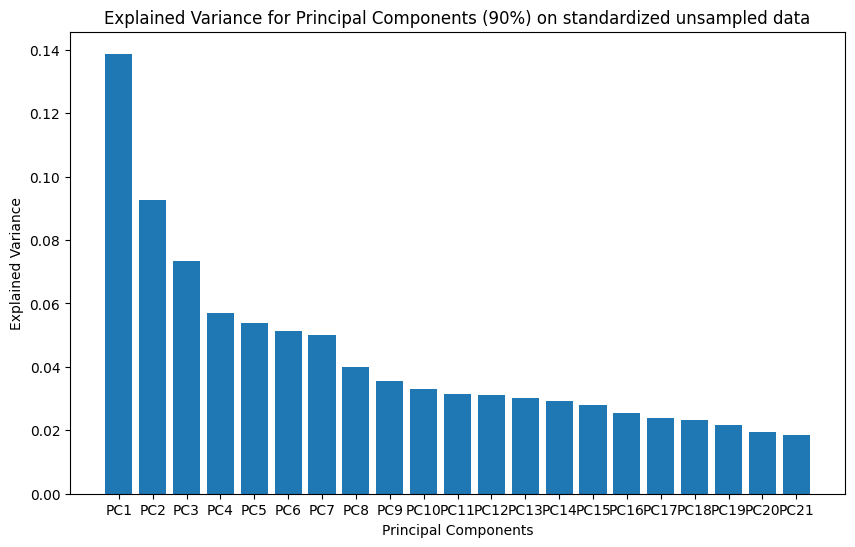


pca_90.explained_variance_ratio_:
 [0.20439633 0.09281071 0.08149174 0.08011977 0.06237117 0.05785505
 0.05544184 0.05187081 0.04307624 0.04118569 0.03246073 0.02643953
 0.0225198  0.02162015 0.01915964 0.01716461]

Total explained variance: 0.9099838264781142

pca.n_components_: 16


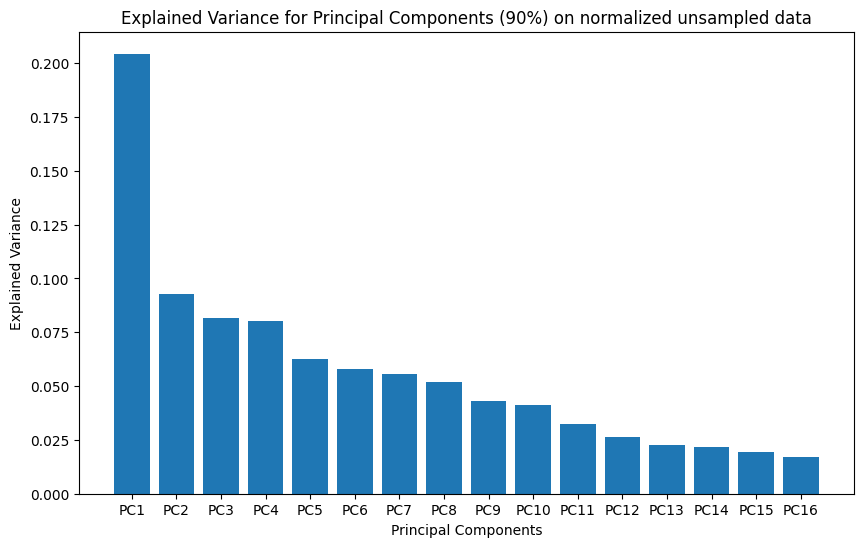

In [326]:
# PCA(90) - Retaining 90% variance/information

# PCA on unsampled x
x_sc_pca_90          = pca_90.fit_transform(x_sc)

print(f'\npca_90.explained_variance_ratio_:\n {pca_90.explained_variance_ratio_}')
print(f'\nTotal explained variance: {(pca_90.explained_variance_ratio_).sum()}')
print(f'\npca.n_components_: {pca_90.n_components_}')
pc_val = range(1, pca_90.n_components_ + 1)
plt.figure(figsize=(10, 6))
plt.bar(pc_val, pca_90.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Principal Components (90%) on standardized unsampled data')
plt.xticks(pc_val, ['PC{}'.format(i) for i in pc_val])
plt.show()

x_mm_pca_90          = pca_90.fit_transform(x_mm)

print(f'\npca_90.explained_variance_ratio_:\n {pca_90.explained_variance_ratio_}')
print(f'\nTotal explained variance: {(pca_90.explained_variance_ratio_).sum()}')
print(f'\npca.n_components_: {pca_90.n_components_}')
pc_val = range(1, pca_90.n_components_ + 1)
plt.figure(figsize=(10, 6))
plt.bar(pc_val, pca_90.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Principal Components (90%) on normalized unsampled data')
plt.xticks(pc_val, ['PC{}'.format(i) for i in pc_val])
plt.show()



# PCA on sampled x

# standardized 
x_smote_sc_pca_90    = pca_90.fit_transform(x_smote_sc)
x_rus_sc_pca_90      = pca_90.fit_transform(x_rus_sc)
x_tom_sc_pca_90      = pca_90.fit_transform(x_tom_sc)
x_smot_tom_sc_pca_90 = pca_90.fit_transform(x_smot_tom_sc)
# normalized
x_smote_mm_pca_90    = pca_90.transform(x_smote_mm)
x_rus_mm_pca_90      = pca_90.transform(x_rus_mm)
x_tom_mm_pca_90      = pca_90.transform(x_tom_mm)
x_smot_tom_mm_pca_90 = pca_90.transform(x_smot_tom_mm)
   


pca_50.explained_variance_ratio_:
 [0.1387201  0.0924944  0.07352027 0.05700762 0.05370115 0.05124474
 0.04991702]

Total explained variance: 0.5166053008405393

pca.n_components_: 7


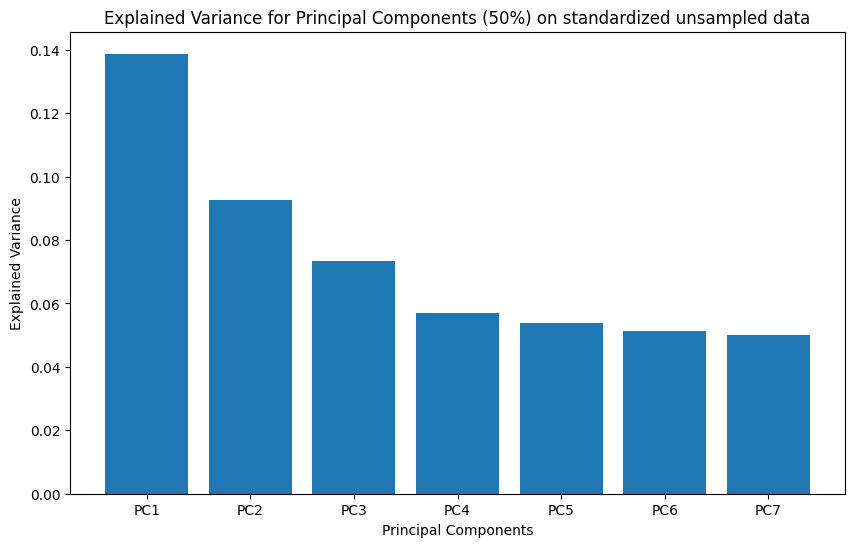


pca_50.explained_variance_ratio_:
 [0.20439633 0.09281071 0.08149174 0.08011977 0.06237117]

Total explained variance: 0.5211897301360894

pca.n_components_: 5


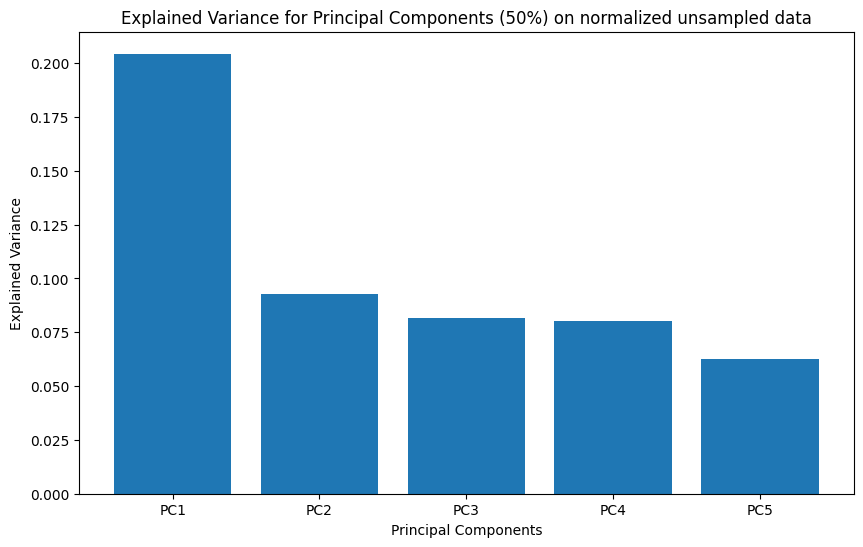

In [327]:
# PCA(50) - Retaining 50% variance/information

# PCA on unsampled x

x_sc_pca_50          = pca_50.fit_transform(x_sc)

print(f'\npca_50.explained_variance_ratio_:\n {pca_50.explained_variance_ratio_}')
print(f'\nTotal explained variance: {(pca_50.explained_variance_ratio_).sum()}')
print(f'\npca.n_components_: {pca_50.n_components_}')
pc_val = range(1, pca_50.n_components_ + 1)
plt.figure(figsize=(10, 6))
plt.bar(pc_val, pca_50.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Principal Components (50%) on standardized unsampled data')
plt.xticks(pc_val, ['PC{}'.format(i) for i in pc_val])
plt.show()

x_mm_pca_50          = pca_50.fit_transform(x_mm)

print(f'\npca_50.explained_variance_ratio_:\n {pca_50.explained_variance_ratio_}')
print(f'\nTotal explained variance: {(pca_50.explained_variance_ratio_).sum()}')
print(f'\npca.n_components_: {pca_50.n_components_}')
pc_val = range(1, pca_50.n_components_ + 1)
plt.figure(figsize=(10, 6))
plt.bar(pc_val, pca_50.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Principal Components (50%) on normalized unsampled data')
plt.xticks(pc_val, ['PC{}'.format(i) for i in pc_val])
plt.show()



# PCA on sampled x

# standardized 
x_smote_sc_pca_50    = pca_50.fit_transform(x_smote_sc)
x_rus_sc_pca_50      = pca_50.fit_transform(x_rus_sc)
x_tom_sc_pca_50      = pca_50.fit_transform(x_tom_sc)
x_smot_tom_sc_pca_50 = pca_50.fit_transform(x_smot_tom_sc)
# normalized
x_smote_mm_pca_50    = pca_50.transform(x_smote_mm)
x_rus_mm_pca_50      = pca_50.transform(x_rus_mm)
x_tom_mm_pca_50      = pca_50.transform(x_tom_mm)
x_smot_tom_mm_pca_50 = pca_50.transform(x_smot_tom_mm)

# Spliting the data into test and train data

### Unsampled and unscaled original data

In [329]:
# Test and train split for unsampled unscaled original data

x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)
print(f'Number of smaples in train set : (features,target)  = {len(x_train),len(y_train)}')
print(f'Number of smaples in test set : (features,target)  = {len(x_test),len(y_test)}')
print(f'Classes in train set: {y_train.value_counts()}')
print(f'\nClasses in test set: {y_test.value_counts()}')

Number of smaples in train set : (features,target)  = (84785, 84785)
Number of smaples in test set : (features,target)  = (21197, 21197)
Classes in train set: accident_severity
0    64842
1    19943
Name: count, dtype: int64

Classes in test set: accident_severity
0    16211
1     4986
Name: count, dtype: int64


### Sampled and scaled data without PCA

In [331]:
# Test and train split for sampled and scaled data (NO PCA)

# RUS - standardized and normalized
x_train_rus_sc, x_test_rus_sc, y_train_rus_sc, y_test_rus_sc=train_test_split(x_rus_sc, y_rus, train_size=0.8, random_state=42, stratify=y_rus)
x_train_rus_mm, x_test_rus_mm, y_train_rus_mm, y_test_rus_mm=train_test_split(x_rus_mm, y_rus, train_size=0.8, random_state=42, stratify=y_rus)

# SMOTETomek - standardized and normalized
x_train_smot_tom_sc, x_test_smot_tom_sc, y_train_smot_tom_sc, y_test_smot_tom_sc=train_test_split(x_smot_tom_sc, y_smot_tom, train_size=0.8, random_state=42, stratify=y_smot_tom)
x_train_smot_tom_mm, x_test_smot_tom_mm, y_train_smot_tom_mm, y_test_smot_tom_mm=train_test_split(x_smot_tom_mm, y_smot_tom, train_size=0.8, random_state=42, stratify=y_smot_tom)

# SMOTE - standardized and normalized
x_train_smote_sc, x_test_smote_sc, y_train_smote_sc, y_test_smote_sc=train_test_split(x_smote_sc, y_smote, train_size=0.8, random_state=42, stratify=y_smote)
x_train_smote_mm, x_test_smote_mm, y_train_smote_mm, y_test_smote_mm=train_test_split(x_smote_mm, y_smote, train_size=0.8, random_state=42, stratify=y_smote)

# Tomek - standardized and normalized
x_train_tom_sc, x_test_tom_sc, y_train_tom_sc, y_test_tom_sc=train_test_split(x_tom_sc, y_tom, train_size=0.8, random_state=42, stratify=y_tom)
x_train_tom_mm, x_test_tom_mm, y_train_tom_mm, y_test_tom_mm=train_test_split(x_tom_mm, y_tom, train_size=0.8, random_state=42, stratify=y_tom)

print(f'Number of samples in RUS_sc train : {len(x_train_rus_sc), len(y_train_rus_sc)}, RUS_sc test : {len(x_test_rus_sc), len(y_test_rus_sc)}')
print(f'Number of samples in RUS_mm train : {len(x_train_rus_mm), len(y_train_rus_mm)}, RUS_mm test : {len(x_test_rus_mm), len(y_test_rus_mm)}')
print(f'\nClasses in RUS_sc train set: {y_train_rus_sc.value_counts()}')
print(f'Classes in RUS_mm train set: {y_train_rus_mm.value_counts()}')

print('______________________________________________________________________________________________')

print(f'\nNumber of samples in SMOTETomek_sc train : {len(x_train_smot_tom_sc), len(y_train_smot_tom_sc)}, SMOTETomek_sc test : {len(x_test_smot_tom_sc), len(y_test_smot_tom_sc)}')
print(f'Number of samples in SMOTETomek_mm train : {len(x_train_smot_tom_mm), len(y_train_smot_tom_mm)}, SMOTETomek_mm test : {len(x_test_smot_tom_mm), len(y_test_smot_tom_mm)}')
print(f'\nClasses in SMOTETomek_sc train set: {y_train_smot_tom_sc.value_counts()}')
print(f'Classes in SMOTETomek_mm train set: {y_train_smot_tom_mm.value_counts()}')

print('______________________________________________________________________________________________')

print(f'\nNumber of samples in SMOTE_sc train : {len(x_train_smote_sc), len(y_train_smote_sc)}, SMOTE_sc test : {len(x_test_smote_sc), len(y_test_smote_sc)}')
print(f'Number of samples in SMOTE_mm train : {len(x_train_smote_mm), len(y_train_smote_mm)}, SMOTE_mm test : {len(x_test_smote_mm), len(y_test_smote_mm)}')
print(f'\nClasses in SMOTE_sc train set: {y_train_smote_sc.value_counts()}')
print(f'Classes in SMOTE_mm train set: {y_train_smote_mm.value_counts()}')

print('______________________________________________________________________________________________')

print(f'\nNumber of samples in Tomek_sc train : {len(x_train_tom_sc), len(y_train_tom_sc)}, Tomek_sc test : {len(x_test_tom_sc), len(y_test_tom_sc)}')
print(f'Number of samples in Tomek_mm train : {len(x_train_tom_mm), len(y_train_tom_mm)}, Tomek_mm test : {len(x_test_tom_mm), len(y_test_tom_mm)}')
print(f'\nClasses in Tomek_sc train set: {y_train_tom_sc.value_counts()}')
print(f'Classes in Tomek_mm train set: {y_train_tom_mm.value_counts()}')


Number of samples in RUS_sc train : (39886, 39886), RUS_sc test : (9972, 9972)
Number of samples in RUS_mm train : (39886, 39886), RUS_mm test : (9972, 9972)

Classes in RUS_sc train set: accident_severity
1    19943
0    19943
Name: count, dtype: int64
Classes in RUS_mm train set: accident_severity
1    19943
0    19943
Name: count, dtype: int64
______________________________________________________________________________________________

Number of samples in SMOTETomek_sc train : (113523, 113523), SMOTETomek_sc test : (28381, 28381)
Number of samples in SMOTETomek_mm train : (113523, 113523), SMOTETomek_mm test : (28381, 28381)

Classes in SMOTETomek_sc train set: accident_severity
1    56762
0    56761
Name: count, dtype: int64
Classes in SMOTETomek_mm train set: accident_severity
1    56762
0    56761
Name: count, dtype: int64
______________________________________________________________________________________________

Number of samples in SMOTE_sc train : (129684, 129684), SMOT

### Sampled and scaled data with PCA

In [332]:
# Test and train split for sampled and PCA applied scaled data

#PCA 90
# RUS - standardized and normalized
x_train_rus_sc_pca_90, x_test_rus_sc_pca_90, y_train_rus_sc_pca_90, y_test_rus_sc_pca_90=train_test_split(x_rus_sc_pca_90, y_rus, train_size=0.8, random_state=42, stratify=y_rus)
x_train_rus_mm_pca_90, x_test_rus_mm_pca_90, y_train_rus_mm_pca_90, y_test_rus_mm_pca_90=train_test_split(x_rus_mm_pca_90, y_rus, train_size=0.8, random_state=42, stratify=y_rus)

# Tomek - standardized and normalized
x_train_tom_sc_pca_90, x_test_tom_sc_pca_90, y_train_tom_sc_pca_90, y_test_tom_sc_pca_90=train_test_split(x_tom_sc_pca_90, y_tom, train_size=0.8, random_state=42, stratify=y_tom)
x_train_tom_mm_pca_90, x_test_tom_mm_pca_90, y_train_tom_mm_pca_90, y_test_tom_mm_pca_90=train_test_split(x_tom_mm_pca_90, y_tom, train_size=0.8, random_state=42, stratify=y_tom)

# SMOTE - standardized and normalized
x_train_smote_sc_pca_90, x_test_smote_sc_pca_90, y_train_smote_sc_pca_90, y_test_smote_sc_pca_90=train_test_split(x_smote_sc_pca_90, y_smote, train_size=0.8, random_state=42, stratify=y_smote)
x_train_smote_mm_pca_90, x_test_smote_mm_pca_90, y_train_smote_mm_pca_90, y_test_smote_mm_pca_90=train_test_split(x_smote_mm_pca_90, y_smote, train_size=0.8, random_state=42, stratify=y_smote)

# SMOTETomek - standardized and normalized
x_train_smot_tom_sc_pca_90, x_test_smot_tom_sc_pca_90, y_train_smot_tom_sc_pca_90, y_test_smot_tom_sc_pca_90=train_test_split(x_smot_tom_sc_pca_90, y_smot_tom, train_size=0.8, random_state=42, stratify=y_smot_tom)
x_train_smot_tom_mm_pca_90, x_test_smot_tom_mm_pca_90, y_train_smot_tom_mm_pca_90, y_test_smot_tom_mm_pca_90=train_test_split(x_smot_tom_mm_pca_90, y_smot_tom, train_size=0.8, random_state=42, stratify=y_smot_tom)



#PCA 50
# RUS - standardized and normalized
x_train_rus_sc_pca_50, x_test_rus_sc_pca_50, y_train_rus_sc_pca_50, y_test_rus_sc_pca_50=train_test_split(x_rus_sc_pca_50, y_rus, train_size=0.8, random_state=42, stratify=y_rus)
x_train_rus_mm_pca_50, x_test_rus_mm_pca_50, y_train_rus_mm_pca_50, y_test_rus_mm_pca_50=train_test_split(x_rus_mm_pca_50, y_rus, train_size=0.8, random_state=42, stratify=y_rus)

# Tomek - standardized and normalized
x_train_tom_sc_pca_50, x_test_tom_sc_pca_50, y_train_tom_sc_pca_50, y_test_tom_sc_pca_50=train_test_split(x_tom_sc_pca_50, y_tom, train_size=0.8, random_state=42, stratify=y_tom)
x_train_tom_mm_pca_50, x_test_tom_mm_pca_50, y_train_tom_mm_pca_50, y_test_tom_mm_pca_50=train_test_split(x_tom_mm_pca_50, y_tom, train_size=0.8, random_state=42, stratify=y_tom)

# SMOTE - standardized and normalized
x_train_smote_sc_pca_50, x_test_smote_sc_pca_50, y_train_smote_sc_pca_50, y_test_smote_sc_pca_50=train_test_split(x_smote_sc_pca_50, y_smote, train_size=0.8, random_state=42, stratify=y_smote)
x_train_smote_mm_pca_50, x_test_smote_mm_pca_50, y_train_smote_mm_pca_50, y_test_smote_mm_pca_50=train_test_split(x_smote_mm_pca_50, y_smote, train_size=0.8, random_state=42, stratify=y_smote)

# SMOTETomek - standardized and normalized
x_train_smot_tom_sc_pca_50, x_test_smot_tom_sc_pca_50, y_train_smot_tom_sc_pca_50, y_test_smot_tom_sc_pca_50=train_test_split(x_smot_tom_sc_pca_50, y_smot_tom, train_size=0.8, random_state=42, stratify=y_smot_tom)
x_train_smot_tom_mm_pca_50, x_test_smot_tom_mm_pca_50, y_train_smot_tom_mm_pca_50, y_test_smot_tom_mm_pca_50=train_test_split(x_smot_tom_mm_pca_50, y_smot_tom, train_size=0.8, random_state=42, stratify=y_smot_tom)


## Saving the xtrain and ytrain variables for quick run

In [44]:
# # Saving variables for easy run

# methods = [
#     'train', 'test',
#     'train_rus_sc', 'test_rus_sc',
#     'train_rus_mm', 'test_rus_mm',
#     'train_smot_tom_sc', 'test_smot_tom_sc',
#     'train_smot_tom_mm', 'test_smot_tom_mm',
#     'train_rus_sc_pca_90', 'test_rus_sc_pca_90',
#     'train_rus_mm_pca_90', 'test_rus_mm_pca_90',
#     'train_smot_tom_sc_pca_90', 'test_smot_tom_sc_pca_90',
#     'train_smot_tom_mm_pca_90', 'test_smot_tom_mm_pca_90',
#     'train_rus_sc_pca_50', 'test_rus_sc_pca_50',
#     'train_rus_mm_pca_50', 'test_rus_mm_pca_50',
#     'train_smot_tom_sc_pca_50', 'test_smot_tom_sc_pca_50',
#     'train_smot_tom_mm_pca_50', 'test_smot_tom_mm_pca_50',
#     'train_tom_sc', 'test_tom_sc',
#     'train_tom_mm', 'test_tom_mm',
#     'train_smote_sc', 'test_smote_sc',
#     'train_smote_mm', 'test_smote_mm',
#     'train_tom_sc_pca_90', 'test_tom_sc_pca_90',
#     'train_tom_mm_pca_90', 'test_tom_mm_pca_90',
#     'train_smote_sc_pca_90', 'test_smote_sc_pca_90',
#     'train_smote_mm_pca_90', 'test_smote_mm_pca_90',
#     'train_tom_sc_pca_50', 'test_tom_sc_pca_50',
#     'train_tom_mm_pca_50', 'test_tom_mm_pca_50',
#     'train_smote_sc_pca_50', 'test_smote_sc_pca_50',
#     'train_smote_mm_pca_50', 'test_smote_mm_pca_50'
# ]

# for method in methods:
#     x_var_name = f'x_{method}'
#     y_var_name = f'y_{method}'

#     if x_var_name in globals() and y_var_name in globals():
#         np.save(f'{x_var_name}.npy', globals()[x_var_name])
#         np.save(f'{y_var_name}.npy', globals()[y_var_name])
#     else:
#         print(f'Variable {x_var_name} or {y_var_name} not found in the global scope.')


In [16]:
# # Loading the variables

# methods = [
#     'train', 'test',
#     'train_rus_sc', 'test_rus_sc',
#     'train_rus_mm', 'test_rus_mm',
#     'train_smot_tom_sc', 'test_smot_tom_sc',
#     'train_smot_tom_mm', 'test_smot_tom_mm',
#     'train_rus_sc_pca_90', 'test_rus_sc_pca_90',
#     'train_rus_mm_pca_90', 'test_rus_mm_pca_90',
#     'train_smot_tom_sc_pca_90', 'test_smot_tom_sc_pca_90',
#     'train_smot_tom_mm_pca_90', 'test_smot_tom_mm_pca_90',
#     'train_rus_sc_pca_50', 'test_rus_sc_pca_50',
#     'train_rus_mm_pca_50', 'test_rus_mm_pca_50',
#     'train_smot_tom_sc_pca_50', 'test_smot_tom_sc_pca_50',
#     'train_smot_tom_mm_pca_50', 'test_smot_tom_mm_pca_50',
#     'train_tom_sc', 'test_tom_sc',
#     'train_tom_mm', 'test_tom_mm',
#     'train_smote_sc', 'test_smote_sc',
#     'train_smote_mm', 'test_smote_mm',
#     'train_tom_sc_pca_90', 'test_tom_sc_pca_90',
#     'train_tom_mm_pca_90', 'test_tom_mm_pca_90',
#     'train_smote_sc_pca_90', 'test_smote_sc_pca_90',
#     'train_smote_mm_pca_90', 'test_smote_mm_pca_90',
#     'train_tom_sc_pca_50', 'test_tom_sc_pca_50',
#     'train_tom_mm_pca_50', 'test_tom_mm_pca_50',
#     'train_smote_sc_pca_50', 'test_smote_sc_pca_50',
#     'train_smote_mm_pca_50', 'test_smote_mm_pca_50'
# ]

# for method in methods:
#     x_var_name = f'x_{method}'
#     y_var_name = f'y_{method}'
    
#     globals()[x_var_name] = np.load(f'{x_var_name}.npy')
#     globals()[y_var_name] = np.load(f'{y_var_name}.npy')
    
#     print(f'{x_var_name} and {y_var_name} have been loaded into the global scope.')


x_train and y_train have been loaded into the global scope.
x_test and y_test have been loaded into the global scope.
x_train_rus_sc and y_train_rus_sc have been loaded into the global scope.
x_test_rus_sc and y_test_rus_sc have been loaded into the global scope.
x_train_rus_mm and y_train_rus_mm have been loaded into the global scope.
x_test_rus_mm and y_test_rus_mm have been loaded into the global scope.
x_train_smot_tom_sc and y_train_smot_tom_sc have been loaded into the global scope.
x_test_smot_tom_sc and y_test_smot_tom_sc have been loaded into the global scope.
x_train_smot_tom_mm and y_train_smot_tom_mm have been loaded into the global scope.
x_test_smot_tom_mm and y_test_smot_tom_mm have been loaded into the global scope.
x_train_rus_sc_pca_90 and y_train_rus_sc_pca_90 have been loaded into the global scope.
x_test_rus_sc_pca_90 and y_test_rus_sc_pca_90 have been loaded into the global scope.
x_train_rus_mm_pca_90 and y_train_rus_mm_pca_90 have been loaded into the global sco

# Machine learning classifiers - Decision Tree, K-Nearest Neighbors, Logistic Regression, LinearSVC, Random Forest and Light Gradient-Boosting Machine

In [333]:
# Classification without sampling (with and without PCA)

model_metrics_list = []
classifiers = [DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, LinearSVC, RandomForestClassifier, LGBMClassifier]

def cls_model(model, x_tr, x_ts, y_tr, y_ts):
    if model in {DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, LGBMClassifier}:
        clf = model(random_state=42)
    elif model == LinearSVC:
        clf = model(random_state=42, max_iter=20000)
    else:
        clf = model()

    start = time.time()
    clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_ts)
    
    accuracy = accuracy_score(y_ts, y_pred)
    precision = precision_score(y_ts, y_pred, zero_division=1)
    recall = recall_score(y_ts, y_pred, zero_division=1)
    f1 = f1_score(y_ts, y_pred, zero_division=1)
    end = time.time()
    run_time = (end - start)/60
    metrics.append([model.__name__, accuracy, precision, recall, f1, run_time])


# Classification on Unsampled data without PCA

In [334]:
# Classification (no PCA) on unsampled data
metrics = []
print('\nClassification (no PCA) on unsampled data')
for classifier in classifiers:
    cls_model(classifier, x_train, x_test, y_train, y_test)


model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[0])


Classification (no PCA) on unsampled data


D:\Apps\WPy64-31241\python-3.12.4.amd64\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 19943, number of negative: 64842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1984
[LightGBM] [Info] Number of data points in the train set: 84785, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.235218 -> initscore=-1.179075
[LightGBM] [Info] Start training from score -1.179075
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.666132   0.304177  0.325712  0.314576  0.020292
1    KNeighborsClassifier  0.728405   0.316166  0.132972  0.187209  0.498333
2      LogisticRegression  0.764825   1.000000  0.000201  0.000401  0.006004
3               LinearSVC  0.764778   1.000000  0.000000  0.000000  0.011351
4  RandomForestClassifier  0.762466   0.475957  0.097272 

# Classification using Random Under Sampler

## RUS without PCA

In [335]:
# Classification using RUS (standardized) without PCA
metrics = []
print('\nClassification using RUS (standardized) without PCA')
for classifier in classifiers:
    cls_model(classifier, x_train_rus_sc, x_test_rus_sc, y_train_rus_sc, y_test_rus_sc)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[1])


# Classification using RUS (normalized) without PCA
metrics = []
print('\nClassification using RUS (normalized) without PCA')
for classifier in classifiers:
    cls_model(classifier, x_train_rus_mm, x_test_rus_mm, y_train_rus_mm, y_test_rus_mm)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[2])



Classification using RUS (standardized) without PCA
[LightGBM] [Info] Number of positive: 19943, number of negative: 19943
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 39886, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.562575   0.563440  0.555756  0.559572  0.008578
1    KNeighborsClassifier  0.581328   0.578906  0.596671  0.587654  0.004920
2      LogisticRegression  0.621540   0.607143  0.688728  0.645367  0.000871
3               LinearSVC  0.622343   0.606606  0.696149  0.648300  0.007959
4  RandomForestClassifier  0.622443   0.617246  0.644605  0

## RUS with PCA

In [336]:
# PCA 90

# Classification using RUS (standardized)
metrics = []
print('\nClassification using RUS (standardized) with PCA (90)')
for classifier in classifiers:
    cls_model(classifier, x_train_rus_sc_pca_90, x_test_rus_sc_pca_90, y_train_rus_sc_pca_90, y_test_rus_sc_pca_90)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[3])

# Classification using RUS (normalized) 
metrics = []
print('\nClassification using RUS (normalized) with PCA (90)')
for classifier in classifiers:
    cls_model(classifier, x_train_rus_mm_pca_90, x_test_rus_mm_pca_90, y_train_rus_mm_pca_90, y_test_rus_mm_pca_90)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[4])


# PCA 50

# Classification using RUS (standardized)
metrics = []
print('\nClassification using RUS (standardized) with PCA (50)')
for classifier in classifiers:
    cls_model(classifier, x_train_rus_sc_pca_50, x_test_rus_sc_pca_50, y_train_rus_sc_pca_50, y_test_rus_sc_pca_50)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[5])

# Classification using RUS (normalized) 
metrics = []
print('\nClassification using RUS (normalized) with PCA (50)')
for classifier in classifiers:
    cls_model(classifier, x_train_rus_mm_pca_50, x_test_rus_mm_pca_50, y_train_rus_mm_pca_50, y_test_rus_mm_pca_50)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[6])


Classification using RUS (standardized) with PCA (90)
[LightGBM] [Info] Number of positive: 19943, number of negative: 19943
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 39886, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.549739   0.548954  0.557762  0.553323  0.024868
1    KNeighborsClassifier  0.578720   0.575992  0.596671  0.586149  0.004846
2      LogisticRegression  0.619936   0.605023  0.690935  0.645131  0.000504
3               LinearSVC  0.619234   0.603409  0.695748  0.646297  0.001714
4  RandomForestClassifier  0.614019   0.608389  0.639992  0.623790  0.335431
5          LGBMClassifier  0.619836   0.6077

# Classification using SMOTETomek

## SMOTETomek without PCA

In [337]:
# SMOTETomek

# Classification using SMOTETomek (standardized) without PCA
metrics = []
print('\nClassification using SMOTETomek (standardized) without PCA')
for classifier in classifiers:
    cls_model(classifier, x_train_smot_tom_sc, x_test_smot_tom_sc, y_train_smot_tom_sc, y_test_smot_tom_sc)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[7])


# Classification using SMOTETomek (normalized) without PCA
metrics = []
print('\nClassification using SMOTETomek (normalized) without PCA')
for classifier in classifiers:
    cls_model(classifier, x_train_smot_tom_mm, x_test_smot_tom_mm, y_train_smot_tom_mm, y_test_smot_tom_mm)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[8])



Classification using SMOTETomek (standardized) without PCA
[LightGBM] [Info] Number of positive: 56762, number of negative: 56761
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2138
[LightGBM] [Info] Number of data points in the train set: 113523, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000018
[LightGBM] [Info] Start training from score 0.000018
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.768225   0.758982  0.786047  0.772277  0.024199
1    KNeighborsClassifier  0.761425   0.731945  0.824947  0.775668  0.036530
2      LogisticRegression  0.697932   0.677114  0.756660  0.714680  0.002449
3               LinearSVC  0.696452   0.671486  0.769204  0.717031  0.030405
4  RandomForestClassifier  0.850675   0.890030  0.800211  0.84

D:\Apps\WPy64-31241\python-3.12.4.amd64\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 56762, number of negative: 56761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2114
[LightGBM] [Info] Number of data points in the train set: 113523, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000018
[LightGBM] [Info] Start training from score 0.000018
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.768789   0.759774  0.786117  0.772721  0.024210
1    KNeighborsClassifier  0.745640   0.728034  0.784214  0.755081  0.036305
2      LogisticRegression  0.696311   0.675509  0.755532  0.713283  0.007474
3               LinearSVC  0.696381   0.671361  0.769345  0.717021  0.031416
4  RandomForestClassifier  0.850463   0.889978  0.799789  

## SMOTETomek with PCA

In [338]:
# PCA 90

# Classification using SMOTETomek (standardized)
metrics = []
print('\nClassification using SMOTETomek (standardized) with PCA (90)')
for classifier in classifiers:
    cls_model(classifier, x_train_smot_tom_sc_pca_90, x_test_smot_tom_sc_pca_90, y_train_smot_tom_sc_pca_90, y_test_smot_tom_sc_pca_90)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[9])

# Classification using SMOTETomek (normalized) 
metrics = []
print('\nClassification using SMOTETomek (normalized) with PCA (90)')
for classifier in classifiers:
    cls_model(classifier, x_train_smot_tom_mm_pca_90, x_test_smot_tom_mm_pca_90, y_train_smot_tom_mm_pca_90, y_test_smot_tom_mm_pca_90)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[10])


# PCA 50

# Classification using SMOTETomek (standardized)
metrics = []
print('\nClassification using SMOTETomek (standardized) with PCA (50)')
for classifier in classifiers:
    cls_model(classifier, x_train_smot_tom_sc_pca_50, x_test_smot_tom_sc_pca_50, y_train_smot_tom_sc_pca_50, y_test_smot_tom_sc_pca_50)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[11])

# Classification using SMOTETomek (normalized) 
metrics = []
print('\nClassification using SMOTETomek (normalized) with PCA (50)')
for classifier in classifiers:
    cls_model(classifier, x_train_smot_tom_mm_pca_50, x_test_smot_tom_mm_pca_50, y_train_smot_tom_mm_pca_50, y_test_smot_tom_mm_pca_50)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[12])


Classification using SMOTETomek (standardized) with PCA (90)
[LightGBM] [Info] Number of positive: 56762, number of negative: 56761
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 113523, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000018
[LightGBM] [Info] Start training from score 0.000018
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.670484   0.664849  0.687526  0.675998  0.083631
1    KNeighborsClassifier  0.748106   0.718651  0.815433  0.763989  0.032858
2      LogisticRegression  0.678553   0.657605  0.744961  0.698563  0.001312
3               LinearSVC  0.678658   0.654423  0.757082  0.702019  0.007122
4  RandomForestClassifier  0.769423   0.770138  0.768076  0.

# Classification using SMOTE

## SMOTE without PCA

In [339]:
# SMOTE

# Classification using SMOTE (standardized) without PCA
metrics = []
print('\nClassification using SMOTE (standardized) without PCA')
for classifier in classifiers:
    cls_model(classifier, x_train_smote_sc, x_test_smote_sc, y_train_smote_sc, y_test_smote_sc)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[13])


# Classification using SMOTE (normalized) without PCA
metrics = []
print('\nClassification using SMOTE (normalized) without PCA')
for classifier in classifiers:
    cls_model(classifier, x_train_smote_mm, x_test_smote_mm, y_train_smote_mm, y_test_smote_mm)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[14])


Classification using SMOTE (standardized) without PCA
[LightGBM] [Info] Number of positive: 64842, number of negative: 64842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2141
[LightGBM] [Info] Number of data points in the train set: 129684, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.753871   0.745335  0.771266  0.758079  0.028186
1    KNeighborsClassifier  0.752020   0.725283  0.811363  0.765912  0.047657
2      LogisticRegression  0.686663   0.666099  0.748566  0.704929  0.003440
3               LinearSVC  0.685121   0.660670  0.761212  0.707386  0.034977
4  RandomForestClassifier  0.831873   0.875070  0.774289  0.821600  0.375426
5          LGBMClassifier  0.815465   0.903

## SMOTE with PCA

In [340]:
# PCA 90

# Classification using SMOTE (standardized)
metrics = []
print('\nClassification using SMOTE (standardized) with PCA (90)')
for classifier in classifiers:
    cls_model(classifier, x_train_smote_sc_pca_90, x_test_smote_sc_pca_90, y_train_smote_sc_pca_90, y_test_smote_sc_pca_90)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[15])

# Classification using SMOTE (normalized) 
metrics = []
print('\nClassification using SMOTE (normalized) with PCA (90)')
for classifier in classifiers:
    cls_model(classifier, x_train_smote_mm_pca_90, x_test_smote_mm_pca_90, y_train_smote_mm_pca_90, y_test_smote_mm_pca_90)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[16])


# PCA 50

# Classification using SMOTE (standardized)
metrics = []
print('\nClassification using SMOTE (standardized) with PCA (50)')
for classifier in classifiers:
    cls_model(classifier, x_train_smote_sc_pca_50, x_test_smote_sc_pca_50, y_train_smote_sc_pca_50, y_test_smote_sc_pca_50)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[17])

# Classification using SMOTE (normalized) 
metrics = []
print('\nClassification using SMOTE (normalized) with PCA (50)')
for classifier in classifiers:
    cls_model(classifier, x_train_smote_mm_pca_50, x_test_smote_mm_pca_50, y_train_smote_mm_pca_50, y_test_smote_mm_pca_50)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[18])


Classification using SMOTE (standardized) with PCA (90)
[LightGBM] [Info] Number of positive: 64842, number of negative: 64842
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 129684, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.660416   0.655765  0.675344  0.665411  0.099677
1    KNeighborsClassifier  0.742274   0.715335  0.804824  0.757446  0.042303
2      LogisticRegression  0.672290   0.652307  0.737894  0.692466  0.001481
3               LinearSVC  0.671612   0.648089  0.751033  0.695774  0.007583
4  RandomForestClassifier  0.760225   0.763508  0.753994  0.758721  1.286315
5          LGBMClassifier  0.722256   0.7

# Classification using TomekLinks

## TomekLinks without PCA

In [341]:
# TomekLinks

# Classification using TomekLinks (standardized) without PCA
metrics = []
print('\nClassification using TomekLinks (standardized) without PCA')
for classifier in classifiers:
    cls_model(classifier, x_train_tom_sc, x_test_tom_sc, y_train_tom_sc, y_test_tom_sc)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[19])


# Classification using TomekLinks (normalized) without PCA
metrics = []
print('\nClassification using TomekLinks (normalized) without PCA')
for classifier in classifiers:
    cls_model(classifier, x_train_tom_mm, x_test_tom_mm, y_train_tom_mm, y_test_tom_mm)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[20])



Classification using TomekLinks (standardized) without PCA
[LightGBM] [Info] Number of positive: 19943, number of negative: 56026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 75969, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262515 -> initscore=-1.032938
[LightGBM] [Info] Start training from score -1.032938
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.645922   0.336283  0.358203  0.346897  0.017840
1    KNeighborsClassifier  0.701153   0.379707  0.218412  0.277311  0.017839
2      LogisticRegression  0.740220   0.548327  0.059166  0.106807  0.001716
3               LinearSVC  0.740062   0.572271  0.038909  0.072864  0.0162

## TomekLinks with PCA

In [342]:
# PCA 90

# Classification using TomekLinks (standardized)
metrics = []
print('\nClassification using TomekLinks (standardized) with PCA (90)')
for classifier in classifiers:
    cls_model(classifier, x_train_tom_sc_pca_90, x_test_tom_sc_pca_90, y_train_tom_sc_pca_90, y_test_tom_sc_pca_90)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[21])

# Classification using TomekLinks (normalized) 
metrics = []
print('\nClassification using TomekLinks (normalized) with PCA (90)')
for classifier in classifiers:
    cls_model(classifier, x_train_tom_mm_pca_90, x_test_tom_mm_pca_90, y_train_tom_mm_pca_90, y_test_tom_mm_pca_90)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[22])


# PCA 50

# Classification using TomekLinks (standardized)
metrics = []
print('\nClassification using TomekLinks (standardized) with PCA (50)')
for classifier in classifiers:
    cls_model(classifier, x_train_tom_sc_pca_50, x_test_tom_sc_pca_50, y_train_tom_sc_pca_50, y_test_tom_sc_pca_50)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[23])

# Classification using TomekLinks (normalized) 
metrics = []
print('\nClassification using TomekLinks (normalized) with PCA (50)')
for classifier in classifiers:
    cls_model(classifier, x_train_tom_mm_pca_50, x_test_tom_mm_pca_50, y_train_tom_mm_pca_50, y_test_tom_mm_pca_50)

model_metrics_list.append(pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']))
print(model_metrics_list[24])


Classification using TomekLinks (standardized) with PCA (90)
[LightGBM] [Info] Number of positive: 19943, number of negative: 56026
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 75969, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262515 -> initscore=-1.032938
[LightGBM] [Info] Start training from score -1.032938
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.634813   0.317416  0.339952  0.328298  0.057819
1    KNeighborsClassifier  0.701995   0.384431  0.224830  0.283726  0.015737
2      LogisticRegression  0.741010   0.571429  0.053751  0.098258  0.000887
3               LinearSVC  0.741220   0.633962  0.033694  0.063988  0.003338
4  RandomForestClassifier  0.739799   0.522495  0.102487  0

# Saving model_metrics_list

In [343]:
# # Saving metrics list:

# np.save('model_metrics_list.npy', model_metrics_list)

# Hyperparameter Tuning

## Metric and graph before hyperparameter tuning


Model evaluation before hyperparameter tuning

Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

 Not_serious       0.82      0.90      0.86     14191
     Serious       0.89      0.80      0.84     14190

    accuracy                           0.85     28381
   macro avg       0.85      0.85      0.85     28381
weighted avg       0.85      0.85      0.85     28381

Confusion matrix for RandomForestClassifier:
[[12788  1403]
 [ 2841 11349]]


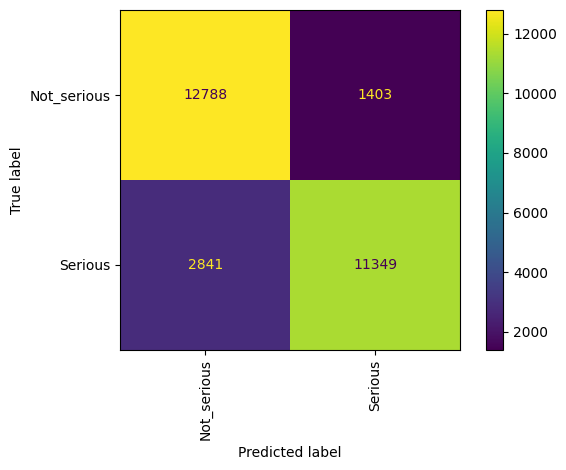

AUC Score for RandomForestClassifier(random_state=42): 0.920


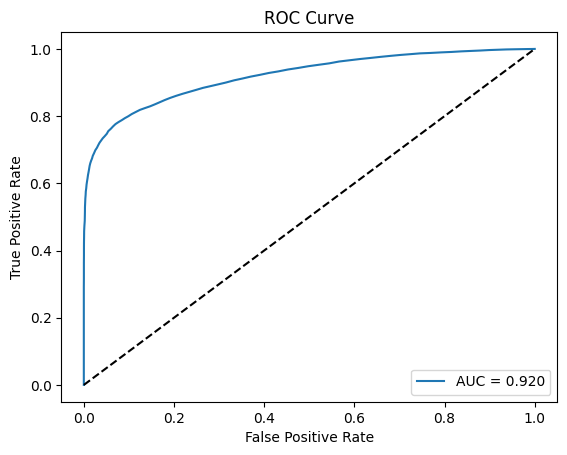

[LightGBM] [Info] Number of positive: 56762, number of negative: 56761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2114
[LightGBM] [Info] Number of data points in the train set: 113523, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000018
[LightGBM] [Info] Start training from score 0.000018

Classification report for LGBMClassifier:
              precision    recall  f1-score   support

 Not_serious       0.78      0.93      0.85     14191
     Serious       0.92      0.74      0.82     14190

    accuracy                           0.84     28381
   macro avg       0.85      0.84      0.84     28381
weighted avg       0.85      0.84      0.84     28381

Confusion matrix for LGBMClassifier:
[[13235   956]
 [ 3639 10551]]


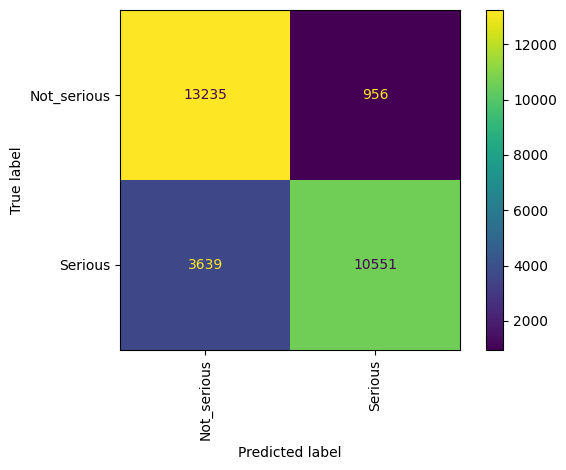

AUC Score for LGBMClassifier(random_state=42): 0.909


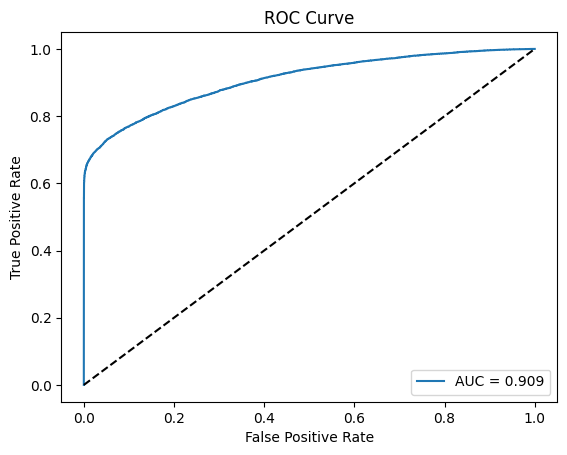

                    Model  Accuracy  Precision    Recall  F1 Score       AUC  \
0  RandomForestClassifier  0.850463   0.889978  0.799789  0.842476  0.919657   
1          LGBMClassifier  0.838096   0.916920  0.743552  0.821185  0.908527   

   time (min)  
0    0.315742  
1    0.007358  


In [346]:
# Metric and graph before hyperparameter tuning

metrics_list = []
classifiers_rf_lg = [RandomForestClassifier, LGBMClassifier]

def cls_model_rf_lg(model, x_ts, y_ts, x_tr, y_tr):

    clf = model(random_state=42)
    start = time.time()
    clf.fit(x_tr, y_tr)
    y_pred = clf.predict(x_ts)
    
    accuracy = accuracy_score(y_ts, y_pred)
    precision = precision_score(y_ts, y_pred, zero_division=1)
    recall = recall_score(y_ts, y_pred, zero_division=1)
    f1 = f1_score(y_ts, y_pred, zero_division=1)
    end = time.time()
    run_time = (end - start)/60
    

    
    target = ['Not_serious', 'Serious']
    print(f'\nClassification report for {model.__name__}:\n{classification_report(y_ts, y_pred, target_names=target, zero_division=1)}')
    confusion = confusion_matrix(y_ts, y_pred)
    print(f'Confusion matrix for {model.__name__}:\n{confusion}')
    ConfusionMatrixDisplay.from_estimator(clf, x_ts, y_ts, display_labels=target, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    auc_score = roc_auc_score(y_ts, clf.predict_proba(x_ts)[:, 1])
    print(f'AUC Score for {clf}: {auc_score:.3f}')
    
    fpr, tpr, thresholds = roc_curve(y_ts, clf.predict_proba(x_ts)[:, 1])
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    metrics_list.append([model.__name__, accuracy, precision, recall, f1, auc_score, run_time])

# Classification
metrics = []
print('\nModel evaluation before hyperparameter tuning')
for classifier in classifiers_rf_lg:
    cls_model_rf_lg(classifier, x_test_smot_tom_mm, y_test_smot_tom_mm, x_train_smot_tom_mm, y_train_smot_tom_mm)


metrics_hyp = pd.DataFrame(metrics_list, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'time (min)'])
print(metrics_hyp)
    

## Hyperparameter tuning of Random Forest

In [3]:
# Hyperparameter tuning of Random Forest

param_dist = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [500, 700],
    'max_depth': [50, 70, 100],
}

start = time.time()

cv_rf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)      

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    cv=cv_rf,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42  
)

random_search_rf.fit(x_train_smot_tom_mm, y_train_smot_tom_mm)

end = time.time()
run_time = end - start

print(f'\nRF time for : {run_time / 60:.2f} minutes')
print(f'Best RF Classifier: {random_search_rf.best_params_} Best RF Accuracy Score: {random_search_rf.best_score_}')



RF time for : 8.14 minutes
Best RF Classifier: {'n_estimators': 700, 'max_depth': 50, 'criterion': 'entropy'} Best RF Accuracy Score: 0.8402614448173497


## Hyperparameter tuning of Light gradient-boosting machine

In [349]:
# Hyperparameter tuning of Light gradient-boosting machine

param_dist = {
    'boosting_type': ['gbdt'],
    'num_leaves': [31, 70],
    'n_estimators': [500, 700, 1000],
    'max_depth': [10, 20, 30],
    'learning_rate': uniform(0.05, 0.19),
    'subsample': uniform(0.6, 0.4)
}

start = time.time()

cv_lgbm = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search_lgbm = RandomizedSearchCV(
    estimator=LGBMClassifier(device='cpu', random_state=42),
    param_distributions=param_dist,
    n_iter=20,  
    cv=cv_lgbm,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42  
)

random_search_lgbm.fit(x_train_smot_tom_mm, y_train_smot_tom_mm)

end = time.time()
run_time = end - start

print(f'\nLGBM time for : {run_time / 60:.2f} minutes')
print(f'Best LGBM Classifier: {random_search.best_params_} Best LGBM Accuracy Score: {random_search.best_score_}')

[LightGBM] [Info] Number of positive: 56762, number of negative: 56761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2114
[LightGBM] [Info] Number of data points in the train set: 113523, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000018
[LightGBM] [Info] Start training from score 0.000018

LGBM time for : 1.83 minutes
Best LGBM Classifier: {'boosting_type': 'gbdt', 'learning_rate': 0.09386982686820831, 'max_depth': 30, 'n_estimators': 1000, 'num_leaves': 70, 'subsample': 0.798070764044508} Best LGBM Accuracy Score: 0.8463923610193529


## Evaluate the best model on the test set using both RF and LGBM along with confusion matrics, AUC and ROC curve


Model evaluation after hyperparameter tuning

Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

 Not_serious       0.82      0.90      0.86     14191
     Serious       0.89      0.80      0.85     14190

    accuracy                           0.85     28381
   macro avg       0.86      0.85      0.85     28381
weighted avg       0.86      0.85      0.85     28381

Confusion matrix for RandomForestClassifier:
[[12802  1389]
 [ 2775 11415]]


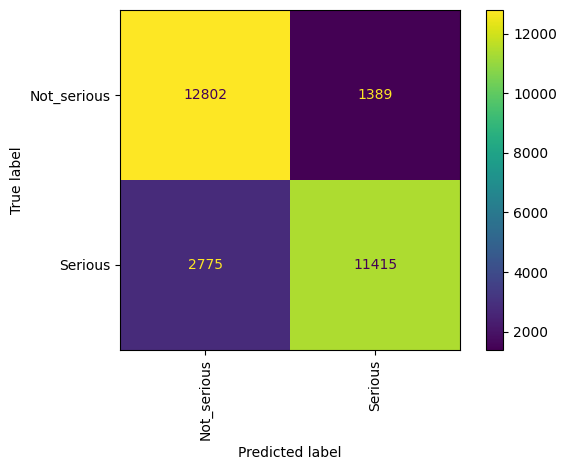

AUC Score for RandomForestClassifier(max_depth=100, n_estimators=500, random_state=42): 0.922


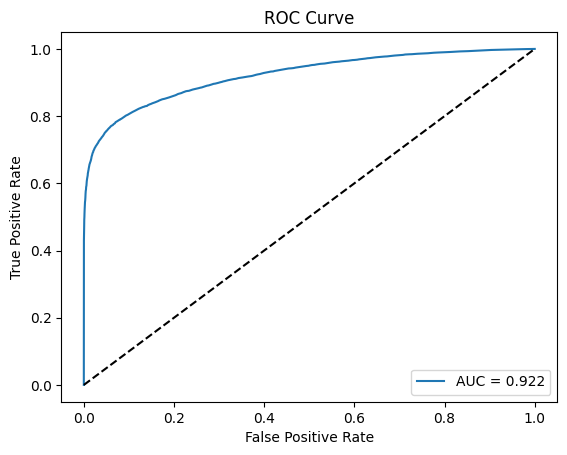


Classification report for LGBMClassifier:
              precision    recall  f1-score   support

 Not_serious       0.81      0.93      0.86     14191
     Serious       0.92      0.78      0.84     14190

    accuracy                           0.85     28381
   macro avg       0.86      0.85      0.85     28381
weighted avg       0.86      0.85      0.85     28381

Confusion matrix for LGBMClassifier:
[[13190  1001]
 [ 3168 11022]]


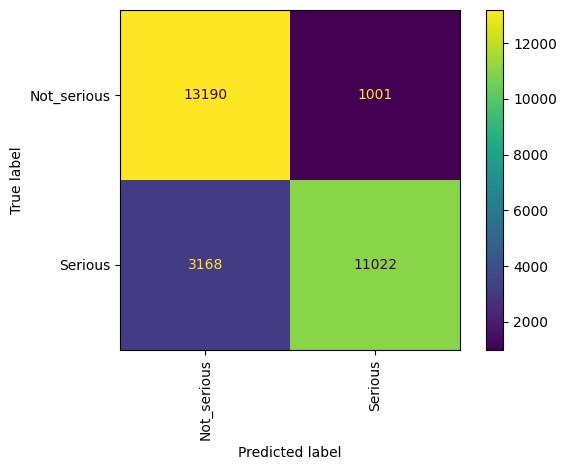

AUC Score for LGBMClassifier(device='cpu', learning_rate=0.09386982686820831, max_depth=30,
               n_estimators=1000, num_leaves=70, random_state=42,
               subsample=0.798070764044508): 0.920


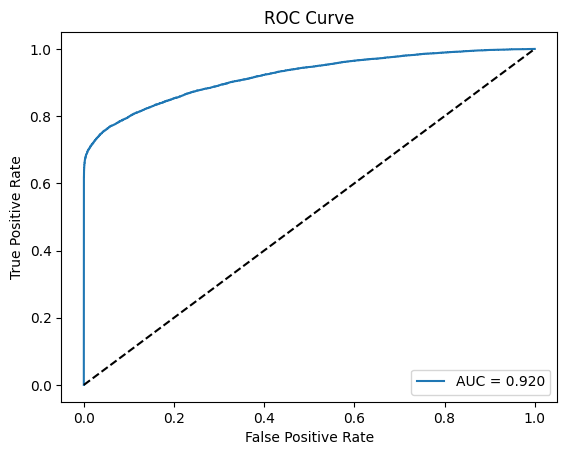

                    Model  Accuracy  Precision    Recall  F1 Score       AUC  \
0  RandomForestClassifier  0.853282   0.891518  0.804440  0.845743  0.921845   
1          LGBMClassifier  0.853106   0.916743  0.776744  0.840957  0.919959   

   time (min)  
0    0.044784  
1    0.003933  


In [351]:
# Evaluate the best model on the test set using both RF and LGBM

metrics_list = []
classifiers_hyp = [RandomForestClassifier, LGBMClassifier]

def cls_model_hyp(model, x_ts, y_ts):
    if (model == RandomForestClassifier):
        clf = random_search_rf.best_estimator_
    else:
        clf = random_search_lgbm.best_estimator_
        
    start = time.time()
    y_pred = clf.predict(x_ts)
    
    accuracy = accuracy_score(y_ts, y_pred)
    precision = precision_score(y_ts, y_pred, zero_division=1)
    recall = recall_score(y_ts, y_pred, zero_division=1)
    f1 = f1_score(y_ts, y_pred, zero_division=1)
    end = time.time()
    run_time = (end - start)/60
    

    
    target = ['Not_serious', 'Serious']
    print(f'\nClassification report for {model.__name__}:\n{classification_report(y_ts, y_pred, target_names=target, zero_division=1)}')
    confusion = confusion_matrix(y_ts, y_pred)
    print(f'Confusion matrix for {model.__name__}:\n{confusion}')
    ConfusionMatrixDisplay.from_estimator(clf, x_ts, y_ts, display_labels=target, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()
    auc_score = roc_auc_score(y_ts, clf.predict_proba(x_ts)[:, 1])
    print(f'AUC Score for {clf}: {auc_score:.3f}')
    
    fpr, tpr, thresholds = roc_curve(y_ts, clf.predict_proba(x_ts)[:, 1])
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    metrics_list.append([model.__name__, accuracy, precision, recall, f1, auc_score, run_time])

# Classification
metrics = []
print('\nModel evaluation after hyperparameter tuning')
for classifier in classifiers_hyp:
    cls_model_hyp(classifier, x_test_smot_tom_mm, y_test_smot_tom_mm)


metrics_hyp = pd.DataFrame(metrics_list, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'time (min)'])
print(metrics_hyp)
    

In [ ]:
# Feature importance using SHAP - Shapely Additive eXplanations

[LightGBM] [Info] Number of positive: 56762, number of negative: 56761
[LightGBM] [Info] Total Bins 2114
[LightGBM] [Info] Number of data points in the train set: 113523, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500004 -> initscore=0.000018
[LightGBM] [Info] Start training from score 0.000018


D:\Apps\WPy64-31241\python-3.12.4.amd64\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


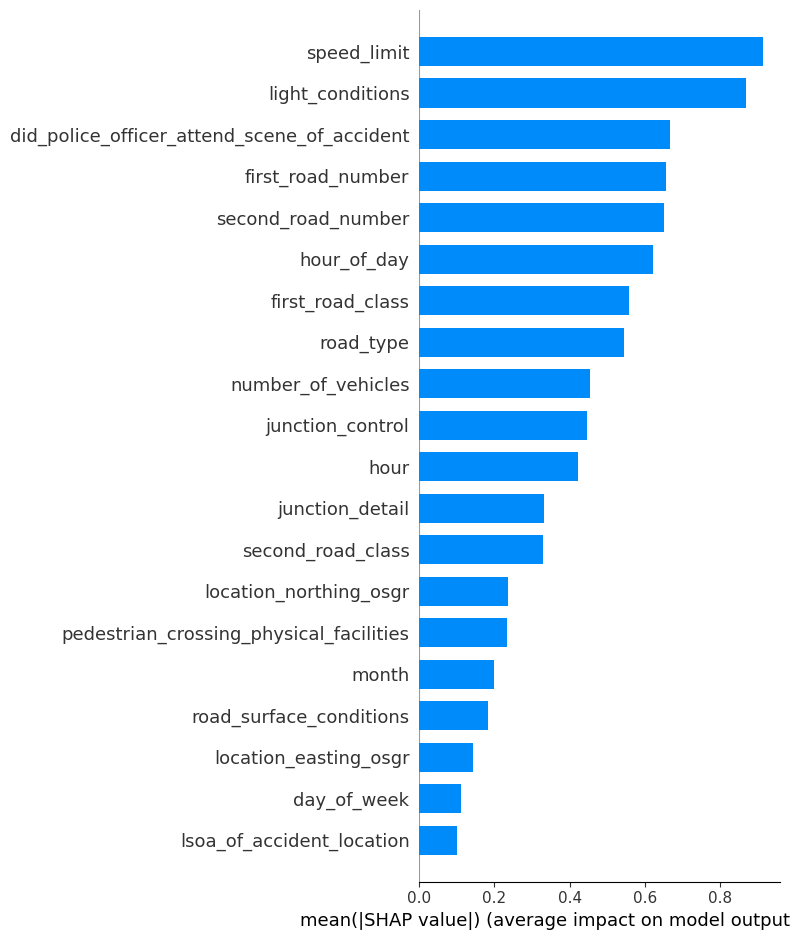

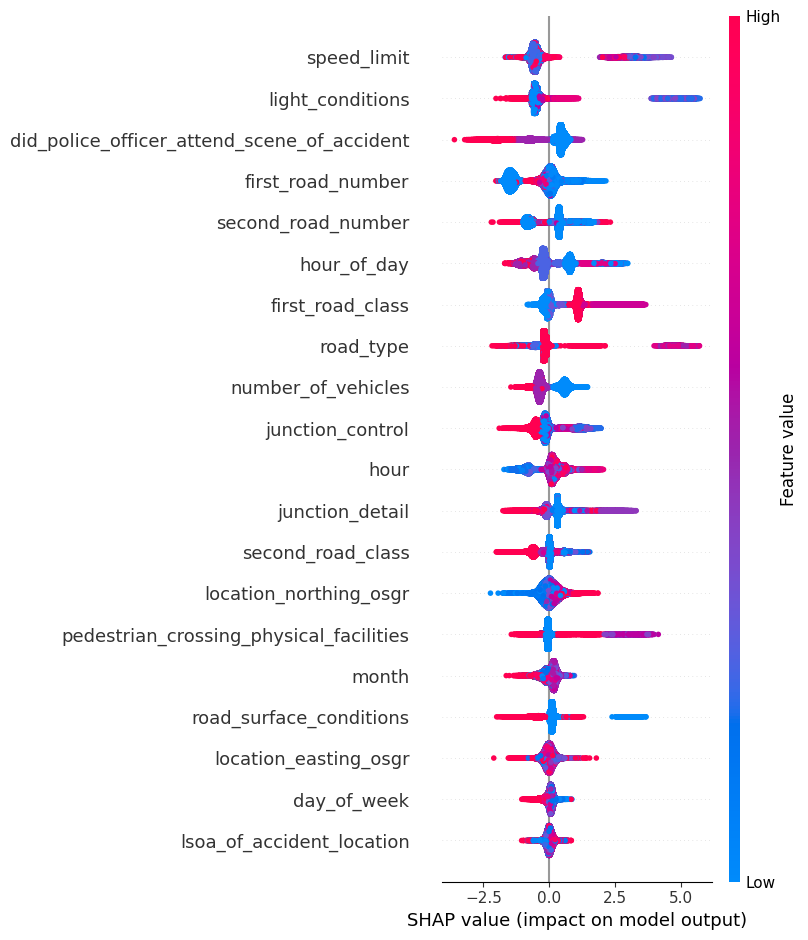

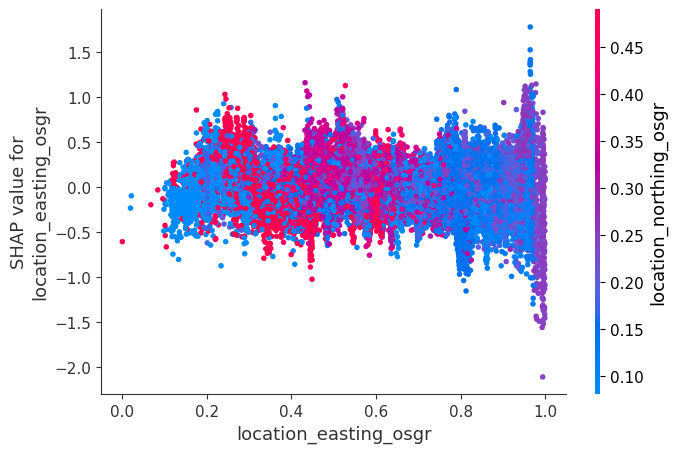

In [24]:

feature_names = [
    "location_easting_osgr", "location_northing_osgr", "longitude", "latitude",
    "police_force", "number_of_vehicles", "number_of_casualties", "day_of_week",
    "local_authority_ons_district", "local_authority_highway", "first_road_class",
    "first_road_number", "road_type", "speed_limit", "junction_detail",
    "junction_control", "second_road_class", "second_road_number",
    "pedestrian_crossing_human_control", "pedestrian_crossing_physical_facilities",
    "light_conditions", "weather_conditions", "road_surface_conditions",
    "special_conditions_at_site", "carriageway_hazards", "urban_or_rural_area",
    "did_police_officer_attend_scene_of_accident", "trunk_road_flag",
    "lsoa_of_accident_location", "month", "hour", "hour_of_day"
]


x_train_df = pd.DataFrame(x_train_smot_tom_mm, columns=feature_names)


model = LGBMClassifier(
    boosting_type='gbdt',
    learning_rate=0.09386982686820831,
    max_depth=30,
    n_estimators=1000,
    num_leaves=70,
    subsample=0.798070764044508,
    force_row_wise=True, 
    random_state=42
)


model.fit(x_train_df, y_train_smot_tom_mm)

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(x_train_df)

def plot_shap_summary(shap_values, x_train_df, feature_names):
    shap.summary_plot(shap_values, x_train_df, feature_names=feature_names, plot_type="bar")
    shap.summary_plot(shap_values, x_train_df, feature_names=feature_names)

def plot_shap_dependence(shap_values, x_train_df, feature_names, feature_index):
    feature_name = feature_names[feature_index]
    shap.dependence_plot(feature_name, shap_values, x_train_df)

plot_shap_summary(shap_values, x_train_df, feature_names)

plot_shap_dependence(shap_values, x_train_df, feature_names, 0)


plt.show()



# Metrics

In [4]:
model_metrics_list = np.load('model_metrics_list.npy', allow_pickle=True)
metrics_list = model_metrics_list.tolist()
titles = [
    'Unsampled data (no PCA)',
    'RUS (standardized) without PCA',
    'RUS (normalized) without PCA',
    'RUS (standardized) with PCA (90)',
    'RUS (normalized) with PCA (90)',
    'RUS (standardized) with PCA (50)',
    'RUS (normalized) with PCA (50)',
    'SMOTETomek (standardized) without PCA',
    'SMOTETomek (normalized) without PCA',
    'SMOTETomek (standardized) with PCA (90)',
    'SMOTETomek (normalized) with PCA (90)',
    'SMOTETomek (standardized) with PCA (50)',
    'SMOTETomek (normalized) with PCA (50)',
    'SMOTE (standardized) without PCA',
    'SMOTE (normalized) without PCA',
    'SMOTE (standardized) with PCA (90)',
    'SMOTE (normalized) with PCA (90)',
    'SMOTE (standardized) with PCA (50)',
    'SMOTE (normalized) with PCA (50)',
    'TomekLinks (standardized) without PCA',
    'TomekLinks (normalized) without PCA',
    'TomekLinks (standardized) with PCA (90)',
    'TomekLinks (normalized) with PCA (90)',
    'TomekLinks (standardized) with PCA (50)',
    'TomekLinks (normalized) with PCA (50)'
]
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'time']

for title, metric in zip(titles, metrics_list):
    df = pd.DataFrame(metric, columns=columns)
    print(f'\n{title}:')
    print(df)
    


Unsampled data (no PCA):
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.666132   0.304177  0.325712  0.314576  0.020517
1    KNeighborsClassifier  0.728405   0.316166  0.132972  0.187209  0.550913
2      LogisticRegression  0.764825   1.000000  0.000201  0.000401  0.006250
3               LinearSVC  0.764778   1.000000  0.000000  0.000000  0.010827
4  RandomForestClassifier  0.762466   0.475957  0.097272  0.161532  0.258353
5          LGBMClassifier  0.767986   0.566929  0.057762  0.104842  0.007360

RUS (standardized) without PCA:
                    Model  Accuracy  Precision    Recall  F1 Score      time
0  DecisionTreeClassifier  0.562575   0.563440  0.555756  0.559572  0.008378
1    KNeighborsClassifier  0.581328   0.578906  0.596671  0.587654  0.005597
2      LogisticRegression  0.621540   0.607143  0.688728  0.645367  0.000788
3               LinearSVC  0.622343   0.606606  0.696149  0.648300  0.007064
4  RandomForestCl